Length of stay (LOS) is an important indicator of the effectiveness of hospital management. 
Reducing the number of days in hospital leads to a decrease in the risk of infection and the effects 
improved quality of treatment and increased benefits to the patient. 
the hospital through more efficient bed management.

However, there is a small group of patients who have much larger discrepancies and who are therefore 
This is a major contributor to an increase in SMD. The aim of this study was to determine the profile of patients who have the largest Acute LOS-ELOS discrepancies, in order to manage their hospital stay more effectively. 
This profile will include, but is not limited to, age, primary and secondary diagnoses, and level of comorbidities.

Description of variables not explicit:
RIW (Resource Intensity Weight) measures the relative amount of resource consumed by patients.
AgeGroup has three values; 1 represents patients under 18 years of age and 3 represent those over 70 years of age and 2 the remaining group.
EcartAcuteLOS-ELOS is the difference between AcuteLOS (Acute DMS) and ELOS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [3]:
data1_1 =  pd.read_excel("CONFIDENTIEL-Donnees DMS Comorbibité.xlsx")

In [5]:
data1_1 =  pd.read_excel("finaldataDMS.xlsx")

In [4]:
data1_1["EcartAcuteLOS-ELOS"] = data1_1["AcuteLOS"] - data1_1["HIG_ELOS"]

In [7]:
data1_2 = data1_1.drop_duplicates(subset=['EncounterNumber'], keep='first')

In [9]:
data1_2.groupby(['ProviderServiceDesc','DischargeNursingAreaUnitDesc']).count()

HIG_Description  \
ProviderServiceDesc              DischargeNursingAreaUnitDesc                    
Emergency Medicine               ADMITTED IN ER                              1   
Family Practice/General Practice 2D MEDECINE                                 4   
                                 3B MH EAST                                  2   
                                 3B MH NORTH                                 3   
                                 3C MEDICINE                              1011   
                                 3C SURGERY                                536   
                                 4A MEDICINE                              1642   
                                 4C MEDICINE                               264   
                                 4C REHAB UNIT                              90   
                                 5C SURGERY                                494   
                                 6C MEDICINE                              1473   
                                 6C Medicine Stroke                          3   
                                 ADMITTED IN ER                             92   
                                 Beacon Heights Level 6                      1   
                                 EMERGENCY                                   1   
                                 FAM BIRTH CENTRE                            1   
                                 ICU                                        11   
                                 PRE-OP UNIT                                 1   
Internal Medicine                1B STEP DOWN UNIT                          97   
                                 2B STEP DOWN UNIT                          38   
                                 2B STEP DOWN UNIT AIU                      17   
                                 3C MEDICINE                               212   
                                 3C SURGERY                                103   
                                 4A MEDICINE                               453   
                                 4C MEDICINE                                23   
                                 4C REHAB UNIT                              14   
                                 5C STEP DOWN UNIT                          10   
                                 5C SURGERY                                121   
                                 6C MEDICINE                               338   
                                 6C Medicine Stroke                          5   
                                 ADMITTED IN ER                             23   
                                 ICU                                       352   
                                 PACU                                        3   
Practitioner Nursing             4C MEDICINE                                 1   

                                                               InstitutionToDesc  \
ProviderServiceDesc              DischargeNursingAreaUnitDesc                      
Emergency Medicine               ADMITTED IN ER                                0   
Family Practice/General Practice 2D MEDECINE                                   4   
                                 3B MH EAST                                    2   
                                 3B MH NORTH                                   3   
                                 3C MEDICINE                                 512   
                                 3C SURGERY                                  295   
                                 4A MEDICINE                                 532   
                                 4C MEDICINE                                 236   
                                 4C REHAB UNIT                                81   
                                 5C SURGERY                                  184   
                                 6C MEDICINE                                 659   
                  

In [13]:
AgeGroup2 = data1_2[data1_2["AgeGroup"] == 2]

In [15]:
AgeGroup3 = data1_2[data1_2["AgeGroup"] == 3]

In [22]:
import scipy.stats as stats
stats.mannwhitneyu(x=AgeGroup2["EcartAcuteLOS-ELOS"], y=AgeGroup3["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=6202509.5, pvalue=9.827316319678544e-14)

In [25]:
data1_2.groupby("ProviderServiceDesc").mean()

/var/folders/3y/lq81_2896n7b3sw4lbgpl5100000gp/T/ipykernel_4875/2842056307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1_2.groupby("ProviderServiceDesc").mean()


,AcuteLOS,ALCLOS,DureeSejour,AgeGroup,ageNumber,ComorbidityLevel,Complexity_Description,DiagnosisOccurrence,DischHour,DureeSejour2,HIG_ELOS,HIG_Weight,RIW,EcartAcuteLOS-ELOS
ProviderServiceDesc,,,,,,,,,,,,,,
Emergency Medicine,1.000000,0.000000,0.000000,3.000000,70.000000,0.000000,NaN,1.000000,10.000000,0.000000,4.000000,0.681600,0.643400,-3.000000
Family Practice/General Practice,7.425831,4.112631,11.514301,2.553384,69.465447,1.168058,NaN,3.739563,13.032333,11.514301,5.397300,1.688817,1.602552,2.028531
Internal Medicine,6.341072,0.957435,7.269210,2.449972,64.228303,1.195135,NaN,3.386954,13.411830,7.269210,5.782145,1.673783,1.430730,0.558928
Practitioner Nursing,19.000000,177.000000,196.000000,3.000000,89.000000,4.000000,NaN,5.000000,9.000000,196.000000,11.500000,22.216800,19.046400,7.500000


In [26]:
FamilyData = data1_2[data1_2["ProviderServiceDesc"] == "Family Practice/General Practice"]

In [27]:
InternalData = data1_2[data1_2["ProviderServiceDesc"] == "Internal Medicine"]

In [32]:
import scipy.stats as stats
stats.mannwhitneyu(x=FamilyData["EcartAcuteLOS-ELOS"], y=InternalData["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=5885978.0, pvalue=1.5123401795978998e-23)

In [37]:
data1_2.groupby("ReAdmitCodeDesc").count()

,HIG_Description,InstitutionToDesc,AcuteLOS,ALCLOS,DureeSejour,AdmissionDate,AgeGroup,ageNumber,CodePostalAbrege,ComorbidityLevel,...,EncounterNumber,Gender,HIG_AtypicalCodeDesc,HIG_ELOS,HIG_Weight,MCC_Description,ProviderServiceDesc,RIW,Typique-Atypique,EcartAcuteLOS-ELOS
ReAdmitCodeDesc,,,,,,,,,,,,,,,,,,,,,
<= 7 days; unplanned readmission (from day surgery) and readmission diagnosis is the same/related to the previous admission,9,3,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,292,139,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Acute <= 7 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,134,59,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
New patient to the acute care unit,2967,1039,2967,2967,2967,2967,2967,2967,2967,2967,...,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967
"None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission",3960,1845,3960,3960,3960,3960,3960,3960,3960,3960,...,3960,3960,3960,3960,3960,3960,3960,3960,3960,3960
Planned readmission from previous acute care (no time restriction)(admit category maybe L - elective or U - urgent/emergent),78,68,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78


In [39]:
NewPatient = data1_2[data1_2["ReAdmitCodeDesc"] == "New patient to the acute care unit"]

In [40]:
UnplaReadsup28 = data1_2[data1_2["ReAdmitCodeDesc"] == "None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission"]

In [45]:
Acute9a28jours = data1_2[data1_2["ReAdmitCodeDesc"] == "Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission"]

In [56]:
from scipy import stats

In [57]:
result = stats.kruskal(NewPatient["EcartAcuteLOS-ELOS"], UnplaReadsup28["EcartAcuteLOS-ELOS"], Acute9a28jours["EcartAcuteLOS-ELOS"])

print(result)

KruskalResult(statistic=20.38993369264627, pvalue=3.735787421224045e-05)


In [66]:
data1_2["DischargeDispositionDesc"].value_counts()

Discharge to private home, condo, apt without support service/referral    3700
Discharge to private home, condo, apt with support                        1358
Transfer to reporting or another facility for inpatient care               842
Transfer to group / supportive living                                      716
Died in Facility                                                           359
Transfer to residential care                                               231
Left against medical advice (LAMA)                                         204
Absent without leave (AWOL)                                                 17
Medical Assistance in Dying (MAID)                                           5
Transfer to reporting or another emergency dept or ambulatory care           5
Transfer to correctional facility                                            3
Name: DischargeDispositionDesc, dtype: int64

In [76]:
FacilityData = data1_2[(data1_2["DischargeDispositionDesc"] == "Transfer to reporting or another facility for inpatient care")|(data1_2["DischargeDispositionDesc"] == "Transfer to group / supportive living")]

In [68]:
HomeData = data1_2[(data1_2["DischargeDispositionDesc"] == "Discharge to private home, condo, apt without support service/referral")| (data1_2["DischargeDispositionDesc"] == "Discharge to private home, condo, apt with support")]

In [72]:
DeadData = data1_2[data1_2["DischargeDispositionDesc"] == "Died in Facility"]

In [7]:
data1_2["DischargeDayOfWeek"] = data1_2['DischargeDate'].dt.day_name()

In [22]:
data1_2["AdmissionDayOfWeek"] = data1_2['AdmissionDate'].dt.day_name()

In [10]:
data1_2.groupby("DischargeDayOfWeek").mean()

/var/folders/3y/lq81_2896n7b3sw4lbgpl5100000gp/T/ipykernel_13863/162076726.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1_2.groupby("DischargeDayOfWeek").mean()


,AcuteLOS,ALCLOS,DureeSejour,AgeGroup,ageNumber,ComorbidityLevel,Complexity_Description,DiagnosisOccurrence,DischHour,DureeSejour2,HIG_ELOS,HIG_Weight,RIW,EcartAcuteLOS-ELOS
DischargeDayOfWeek,,,,,,,,,,,,,,
Friday,7.179587,2.628553,9.790698,2.553618,69.180879,1.175711,NaN,3.671189,13.382429,9.790698,5.493346,1.550690,1.485992,1.686240
Monday,7.031792,3.337187,10.343931,2.542389,68.595376,1.202312,NaN,3.716763,13.178227,10.343931,5.586031,1.581250,1.457417,1.445761
Saturday,5.960217,0.560579,6.477396,2.459313,65.998192,1.075949,NaN,3.350814,13.043400,6.477396,5.287161,1.331344,1.235176,0.673056
Sunday,5.319923,1.227969,6.513410,2.463602,64.800766,0.994253,NaN,3.210728,12.963602,6.513410,4.668391,1.267042,1.175706,0.651533
Thursday,7.492331,4.974693,12.445552,2.545245,68.937883,1.148006,NaN,3.697086,13.108129,12.445552,5.660506,1.943170,1.772738,1.831825
Tuesday,7.898058,4.010518,11.884304,2.539644,68.549353,1.245955,NaN,3.701456,13.058252,11.884304,5.675081,1.880731,1.740947,2.222977
Wednesday,7.484262,4.141243,11.595642,2.514124,67.901533,1.228410,NaN,3.807103,12.939467,11.595642,5.487006,1.823414,1.658838,1.997256


In [23]:
def WeekdaySepar(x):
    if x == "Saturday" or x == "Sunday":
        return 1
    else:
        return 0
data1_2["BinaryAdmissionDayOfWeek"] = data1_2["AdmissionDayOfWeek"].apply(WeekdaySepar)    
WeekendAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 1]
WeekAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 0]

In [15]:
def WeekdaySepar(x):
    if x == "Saturday" or x == "Sunday":
        return 1
    else:
        return 0
data1_2["BinaryDischargeDayOfWeek"] = data1_2["DischargeDayOfWeek"].apply(WeekdaySepar)    
WeekendDischarge = data1_2[data1_2["BinaryDischargeDayOfWeek"] == 1]
WeekDischarge = data1_2[data1_2["BinaryDischargeDayOfWeek"] == 0]

In [21]:
import scipy.stats as stats
stats.mannwhitneyu(x=WeekendDischarge["EcartAcuteLOS-ELOS"], y=WeekDischarge["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=3018883.0, pvalue=6.554792229939137e-10)

In [24]:
import scipy.stats as stats
stats.mannwhitneyu(x=WeekendAdmission["EcartAcuteLOS-ELOS"], y=WeekAdmission["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=5437909.5, pvalue=0.5188101753138032)

In [35]:
data1_2.groupby("MCC_Description").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
MCC_Description,,,,,,,,
Burns,1.0,-4.900000,NaN,-4.9,-4.900,-4.90,-4.900,-4.9
"Diseases & Disorders of Ear, Nose, Mouth & Throat",253.0,1.454941,5.088825,-4.8,-0.700,0.30,2.100,58.6
Diseases & Disorders of the Blood & Lymphatic System,58.0,0.024138,5.312822,-8.1,-3.400,-0.65,2.250,16.6
Diseases & Disorders of the Circulatory System,1443.0,1.573527,4.857253,-17.6,-0.900,0.30,2.900,43.5
Diseases & Disorders of the Digestive System,205.0,2.937073,8.534227,-17.4,-2.200,0.10,5.500,35.2
"Diseases & Disorders of the Endocrine System, Nutrition & Metabolism",987.0,1.100405,5.232788,-13.0,-1.600,-0.20,2.250,59.6
Diseases & Disorders of the Female Reproductive System,2.0,0.900000,2.121320,-0.6,0.150,0.90,1.650,2.4
Diseases & Disorders of the Hepatobiliary System & Pancreas,465.0,2.072258,7.528728,-15.3,-1.700,0.30,3.500,44.9
"Diseases & Disorders of the Kidney, Urinary Tract & Male Reproductive System",30.0,3.396667,7.670835,-3.2,-1.925,1.60,3.175,30.9


In [36]:
CircuData = data1_2[data1_2["MCC_Description"] == "Diseases & Disorders of the Circulatory System"]

In [37]:
DigesData = data1_2[data1_2["MCC_Description"] == "Diseases & Disorders of the Digestive System"]

In [38]:
RespiData = data1_2[data1_2["MCC_Description"] == "Diseases & Disorders of the Respiratory System"]

In [39]:
MentData = data1_2[data1_2["MCC_Description"] == "Mental Diseases & Disorders"]

In [40]:
TrauData = data1_2[data1_2["MCC_Description"] == "Significant Trauma, Injury, Poisoning & Toxic Effects of Drugs"]

In [44]:
result = stats.kruskal(CircuData["EcartAcuteLOS-ELOS"], DigesData["EcartAcuteLOS-ELOS"],RespiData["EcartAcuteLOS-ELOS"] )

print(result)

KruskalResult(statistic=25.45569649494757, pvalue=2.967329263831142e-06)


In [32]:
data1_2["MCC_Description"].value_counts()

Diseases & Disorders of the Respiratory System                                  2287
Diseases & Disorders of the Circulatory System                                  1443
Diseases & Disorders of the Endocrine System, Nutrition & Metabolism             987
Diseases & Disorders of the Skin, Subcutaneous Tissue & Breast                   557
Mental Diseases & Disorders                                                      505
Diseases & Disorders of the Hepatobiliary System & Pancreas                      465
Significant Trauma, Injury, Poisoning & Toxic Effects of Drugs                   315
Diseases & Disorders of Ear, Nose, Mouth & Throat                                253
Diseases & Disorders of the Digestive System                                     205
Diseases & Disorders of the Musculoskeletal System & Connective Tissue           119
Other Reasons for Hospitalization                                                 98
Multisystemic or Unspecified Site Infections                     

In [10]:
outlier_data = data1_2[data1_2["EcartAcuteLOS-ELOS"]>=7]

In [11]:
outlier_data.groupby('ReAdmitCodeDesc')["EcartAcuteLOS-ELOS"].describe()

,count,mean,std,min,25%,50%,75%,max
ReAdmitCodeDesc,,,,,,,,
Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,44.0,15.495455,8.937820,7.0,8.575,11.95,18.625,43.5
Acute <= 7 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,23.0,17.734783,12.854840,7.3,8.550,14.80,21.300,59.6
New patient to the acute care unit,314.0,14.073248,7.788296,7.0,8.625,11.85,17.300,49.6
"None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission",519.0,15.162428,12.470978,7.0,8.700,11.50,17.700,204.5
Planned readmission from previous acute care (no time restriction)(admit category maybe L - elective or U - urgent/emergent),26.0,16.303846,11.813771,7.2,9.925,12.85,17.400,63.5


In [7]:
data1_2.groupby('ReAdmitCodeDesc')["EcartAcuteLOS-ELOS"].describe()

,count,mean,std,min,25%,50%,75%,max
ReAdmitCodeDesc,,,,,,,,
<= 7 days; unplanned readmission (from day surgery) and readmission diagnosis is the same/related to the previous admission,9.0,-0.888889,2.630800,-4.7,-2.400,-1.4,0.30,3.0
Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,292.0,2.175000,7.263823,-19.8,-1.700,0.6,3.50,43.5
Acute <= 7 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,134.0,2.651493,9.084364,-10.7,-1.925,0.1,3.45,59.6
New patient to the acute care unit,2967.0,1.172363,5.887565,-21.7,-1.700,-0.1,2.50,49.6
"None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission",3960.0,1.909646,7.414161,-21.3,-1.600,0.2,3.30,204.5
Planned readmission from previous acute care (no time restriction)(admit category maybe L - elective or U - urgent/emergent),78.0,5.271795,10.919444,-10.7,-0.275,3.4,9.55,63.5


In [15]:
outlier_data.groupby("ComorbidityLevel")["EcartAcuteLOS-ELOS"].describe()

,count,mean,std,min,25%,50%,75%,max
ComorbidityLevel,,,,,,,,
0,124.0,12.525000,8.040736,7.0,8.10,10.15,13.20,63.5
1,131.0,12.581679,6.432356,7.0,8.35,10.50,14.80,47.1
2,200.0,13.564500,14.933278,7.0,8.20,10.40,15.35,204.5
3,244.0,14.761066,8.737691,7.0,8.90,11.80,17.65,81.4
4,227.0,18.881057,11.325015,7.0,10.20,15.60,23.70,77.7


In [14]:
data1_2.groupby("ComorbidityLevel")["EcartAcuteLOS-ELOS"].describe()

,count,mean,std,min,25%,50%,75%,max
ComorbidityLevel,,,,,,,,
0,3249.0,-0.054232,3.984440,-20.1,-1.900,-0.60,1.100,63.5
1,1604.0,1.052244,4.749596,-21.7,-1.500,0.10,2.400,47.1
2,1160.0,2.430948,8.568469,-21.3,-1.300,0.90,4.525,204.5
3,899.0,4.190879,8.559646,-19.8,-1.050,2.40,7.600,81.4
4,526.0,8.238403,12.365376,-17.6,0.225,5.10,13.475,77.7
8,2.0,0.850000,1.626346,-0.3,0.275,0.85,1.425,2.0


In [ ]:
data1_2[d]

In [22]:
data1_2.groupby("AgeGroup")["EcartAcuteLOS-ELOS"].mean()

AgeGroup
1   -8.133333
2    1.061433
3    2.221759
Name: EcartAcuteLOS-ELOS, dtype: float64

In [25]:
g = data1_2[data1_2["AgeGroup"] == 2]

In [27]:
g[g["EcartAcuteLOS-ELOS"]>=7]

,HIG_Description,InstitutionToDesc,AcuteLOS,ALCLOS,DureeSejour,AdmissionDate,AgeGroup,ageNumber,CodePostalAbrege,ComorbidityLevel,...,HIG_AtypicalCodeDesc,HIG_ELOS,HIG_Weight,MCC_Description,ProviderServiceDesc,ReAdmitCodeDesc,RIW,Typique-Atypique,EcartAcuteLOS-ELOS,AdmissionYear
0,Disorder related to Nutrition,Champlain - Ottawa (HC),43,160,203,2017-10-13,2,23,K1G,0,...,LS Transfer In,7.2,29.4705,"Diseases & Disorders of the Endocrine System, ...",Family Practice/General Practice,Planned readmission from previous acute care (...,24.1472,ATYPIQUE,35.8,2017
189,Bacterial Pneumonia,NaN,29,0,29,2018-03-05,2,58,K1K,4,...,Typical,18.9,11.8696,Diseases & Disorders of the Respiratory System,Internal Medicine,"None of the above, i.e. unplanned readmission ...",14.9183,TYPIQUE,10.1,2018
203,Chronic Obstructive Pulmonary Disease with Low...,Hopital Montfort - Ottawa (GR),28,0,28,2018-03-06,2,49,K1L,3,...,Typical,15.5,7.5747,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,New patient to the acute care unit,14.7559,TYPIQUE,12.5,2018
220,Cirrhosis/Alcoholic Hepatitis,NaN,29,8,37,2018-03-07,2,65,K1L,1,...,LS (Long Stay),5.5,4.7747,Diseases & Disorders of the Hepatobiliary Syst...,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",4.7553,ATYPIQUE,23.5,2018
362,Cirrhosis/Alcoholic Hepatitis,Champlain - Ottawa (HC),17,0,17,2018-03-26,2,69,K4K,4,...,Typical,7.4,1.2110,Diseases & Disorders of the Hepatobiliary Syst...,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",2.3243,TYPIQUE,9.6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43242,Cellulitis,Champlain - Ottawa (HC),27,29,56,2019-02-14,2,58,K1J,4,...,LS (Long Stay),5.2,8.2570,"Diseases & Disorders of the Skin, Subcutaneous...",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",6.9542,ATYPIQUE,21.8,2019
43336,Chronic Obstructive Pulmonary Disease without ...,Champlain - Ottawa (HC),31,0,31,2019-03-18,2,65,K1N,0,...,LS (Long Stay),5.4,3.9844,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",3.8255,ATYPIQUE,25.6,2019
43383,Chronic Obstructive Pulmonary Disease with Low...,Hopital Montfort - Ottawa (GR),17,0,17,2019-03-22,2,61,K1K,2,...,Typical,7.5,2.3878,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,New patient to the acute care unit,1.0610,TYPIQUE,9.5,2019
43420,Cellulitis,Champlain - Ottawa (HC),14,0,14,2019-03-27,2,65,K4K,2,...,Typical,6.5,1.0909,"Diseases & Disorders of the Skin, Subcutaneous...",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",1.1684,TYPIQUE,7.5,2019


In [29]:
h = data1_2[data1_2["AgeGroup"] == 3]

In [30]:
h[h["EcartAcuteLOS-ELOS"]>=7]

,HIG_Description,InstitutionToDesc,AcuteLOS,ALCLOS,DureeSejour,AdmissionDate,AgeGroup,ageNumber,CodePostalAbrege,ComorbidityLevel,...,HIG_AtypicalCodeDesc,HIG_ELOS,HIG_Weight,MCC_Description,ProviderServiceDesc,ReAdmitCodeDesc,RIW,Typique-Atypique,EcartAcuteLOS-ELOS,AdmissionYear
34,Chronic Obstructive Pulmonary Disease with Low...,NaN,15,95,110,2018-01-14,3,102,K1K,4,...,LS Death,5.8,14.3040,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",14.3684,ATYPIQUE,9.2,2018
58,Disequilibrium/Hearing Loss,NaN,10,0,10,2018-04-03,3,70,K1J,0,...,Typical,2.7,0.4408,"Diseases & Disorders of Ear, Nose, Mouth & Throat",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.3954,TYPIQUE,7.3,2018
138,Fixation/Repair Hip/Femur,Sisters Of Charity Of Ottawa Hospital - Ottawa...,22,34,56,2018-02-21,3,92,K1J,3,...,LS (Long Stay),7.8,8.0283,"Significant Trauma, Injury, Poisoning & Toxic ...",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",7.6091,ATYPIQUE,14.2,2018
162,Fracture/Dislocation/Rupture of Pelvis/Sacrum/...,Extendicare/laurier Manor - Gloucester (NH),57,65,122,2018-02-27,3,76,K1K,4,...,LS (Long Stay),7.4,17.9019,"Significant Trauma, Injury, Poisoning & Toxic ...",Family Practice/General Practice,New patient to the acute care unit,13.8944,ATYPIQUE,49.6,2018
181,Fracture/Dislocation/Rupture of Pelvis/Sacrum/...,St. Louis Residence - Gloucester (HF),29,39,68,2018-03-03,3,86,K1C,2,...,LS (Long Stay),8.0,8.5177,"Significant Trauma, Injury, Poisoning & Toxic ...",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",7.6569,ATYPIQUE,21.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43301,Dementia,NaN,31,0,31,2019-03-01,3,80,K1C,2,...,Death,10.5,4.3245,Mental Diseases & Disorders,Family Practice/General Practice,New patient to the acute care unit,3.5153,ATYPIQUE,20.5,2019
43317,Chronic Obstructive Pulmonary Disease with Low...,NaN,26,267,293,2019-03-08,3,78,K1L,4,...,LS Death,7.5,54.4345,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,Acute 8-28 days; unplanned readmission from pr...,38.8997,ATYPIQUE,18.5,2019
43356,Aspiration Pneumonia,Extendicare/laurier Manor - Gloucester (NH),29,20,49,2019-03-21,3,88,K0A,3,...,LS (Long Stay),6.6,6.0816,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",6.7118,ATYPIQUE,22.4,2019
43388,Chronic Obstructive Pulmonary Disease with Low...,Champlain - Ottawa (HC),20,6,26,2019-03-23,3,95,K1K,4,...,LS (Long Stay),6.9,3.3881,Diseases & Disorders of the Respiratory System,Internal Medicine,"None of the above, i.e. unplanned readmission ...",2.2580,ATYPIQUE,13.1,2019


In [17]:
data1_2["AdmissionYear"] = data1_2["AdmissionDate"].dt.year

In [14]:
data1_2[(data1_2["EcartAcuteLOS-ELOS"]>0)]

,HIG_Description,InstitutionToDesc,AcuteLOS,ALCLOS,DureeSejour,AdmissionDate,AgeGroup,ageNumber,CodePostalAbrege,ComorbidityLevel,...,Gender,HIG_AtypicalCodeDesc,HIG_ELOS,HIG_Weight,MCC_Description,ProviderServiceDesc,ReAdmitCodeDesc,RIW,Typique-Atypique,EcartAcuteLOS-ELOS
0,Disorder related to Nutrition,Champlain - Ottawa (HC),43,160,203,2017-10-13,2,23,K1G,0,...,F,LS Transfer In,7.2,29.4705,"Diseases & Disorders of the Endocrine System, ...",Family Practice/General Practice,Planned readmission from previous acute care (...,24.1472,ATYPIQUE,35.8
20,Arrhythmia without Coronary Angiogram,NaN,4,0,4,2018-04-01,3,90,K1K,1,...,F,Typical,3.5,0.5907,Diseases & Disorders of the Circulatory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.8178,TYPIQUE,0.5
34,Chronic Obstructive Pulmonary Disease with Low...,NaN,15,95,110,2018-01-14,3,102,K1K,4,...,M,LS Death,5.8,14.3040,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",14.3684,ATYPIQUE,9.2
50,Arrhythmia without Coronary Angiogram,NaN,9,0,9,2018-04-02,3,84,K1N,1,...,F,Typical,3.5,0.5907,Diseases & Disorders of the Circulatory System,Family Practice/General Practice,Acute 8-28 days; unplanned readmission from pr...,0.8178,TYPIQUE,5.5
58,Disequilibrium/Hearing Loss,NaN,10,0,10,2018-04-03,3,70,K1J,0,...,F,Typical,2.7,0.4408,"Diseases & Disorders of Ear, Nose, Mouth & Throat",Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.3954,TYPIQUE,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43463,Chronic Obstructive Pulmonary Disease with Low...,HOME FOR THE AGED-ONTARIO-GENERIC #,7,0,7,2019-03-30,3,81,K1J,1,...,M,Typical,5.7,0.9403,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.8276,TYPIQUE,1.3
43475,Chronic Obstructive Pulmonary Disease without ...,Champlain - Ottawa (HC),6,0,6,2019-03-30,2,58,K1K,0,...,M,Typical,4.8,0.8043,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.6448,TYPIQUE,1.2
43489,Angina (except Unstable)/Chest Pain with Coron...,HOME FOR THE AGED-ONTARIO-GENERIC #,13,0,13,2019-03-30,3,71,K0B,0,...,F,Typical,4.1,0.6532,Diseases & Disorders of the Circulatory System,Internal Medicine,New patient to the acute care unit,1.9535,TYPIQUE,8.9
43491,Asthma,HOME FOR THE AGED-ONTARIO-GENERIC #,4,0,4,2019-03-31,2,66,K1L,0,...,M,Typical,3.2,0.5215,Diseases & Disorders of the Respiratory System,Family Practice/General Practice,"None of the above, i.e. unplanned readmission ...",0.4526,TYPIQUE,0.8


In [12]:
data1_2[(data1_2["EcartAcuteLOS-ELOS"]<7) & (data1_2["EcartAcuteLOS-ELOS"]>0) ]["EcartAcuteLOS-ELOS"].describe()

count    2831.000000
mean        2.444507
std         1.854694
min         0.100000
25%         0.900000
50%         2.000000
75%         3.700000
max         6.900000
Name: EcartAcuteLOS-ELOS, dtype: float64

In [10]:
data1_2[data1_2["EcartAcuteLOS-ELOS"]>=7]["EcartAcuteLOS-ELOS"].describe()

count    926.000000
mean      14.904860
std       10.935167
min        7.000000
25%        8.700000
50%       11.800000
75%       17.750000
max      204.500000
Name: EcartAcuteLOS-ELOS, dtype: float64

In [101]:
xdata1_3 = data1_2[["ageNumber","ComorbidityLevel","Gender","RIW","Typique-Atypique","MCC_Description"]]

In [15]:
ydata1_3 = data1_2["EcartAcuteLOS-ELOS"]

In [82]:
xdata1_4["MCC_Description"].value_counts().index

Index(['Diseases & Disorders of the Respiratory System',
       'Diseases & Disorders of the Circulatory System',
       'Diseases & Disorders of the Endocrine System, Nutrition & Metabolism',
       'Diseases & Disorders of the Skin, Subcutaneous Tissue & Breast',
       'Mental Diseases & Disorders',
       'Diseases & Disorders of the Hepatobiliary System & Pancreas',
       'Significant Trauma, Injury, Poisoning & Toxic Effects of Drugs',
       'Diseases & Disorders of Ear, Nose, Mouth & Throat',
       'Diseases & Disorders of the Digestive System',
       'Diseases & Disorders of the Musculoskeletal System & Connective Tissue',
       'Other Reasons for Hospitalization',
       'Multisystemic or Unspecified Site Infections',
       'Diseases & Disorders of the Blood & Lymphatic System',
       'Diseases & Disorders of the Kidney, Urinary Tract & Male Reproductive System',
       'Diseases & Disorders of the Nervous System', 'Pregnancy & Childbirth',
       'Miscellaneous CMG & U

In [102]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
xdata1_3["Gender"] = le_Gender.fit_transform(xdata1_3["Gender"])

In [103]:
le_Typique = LabelEncoder()
xdata1_3["Typique-Atypique"] = le_Typique.fit_transform(xdata1_3["Typique-Atypique"])

In [104]:
le_MCC = LabelEncoder()
xdata1_3["MCC_Description"] = le_MCC.fit_transform(xdata1_3["MCC_Description"])

In [105]:
def MCC_cleaner(x):
    if x in [0,6,14,17,10,8,2,15,16]:
        return 0
    else:
        return x

In [106]:
xdata1_3["MCC_Description"] = xdata1_3["MCC_Description"].apply(MCC_cleaner)

In [117]:
xdata1_3

,ageNumber,ComorbidityLevel,Gender,RIW,Typique-Atypique,MCC_Description
0,23,0,0,24.1472,0,5
7,83,3,1,31.1030,0,13
20,90,1,0,0.8178,1,3
24,28,2,0,1.0348,1,12
32,34,0,1,0.6481,1,12
...,...,...,...,...,...,...
43491,66,0,1,0.4526,1,11
43495,52,0,0,0.6448,1,11
43500,42,2,1,2.7903,1,11
43507,56,0,0,0.3891,1,1


In [112]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(xdata1_3.values,ydata1_3.values)

RandomForestRegressor(random_state=0)

In [4]:
import pickle

In [8]:
pred = mode.predict([[23,0,0,10,0,0]])

In [43]:
y_pred = random_forest_reg.predict(xdata1_3)

In [1]:
import pickle

In [7]:
mode = pickle.load(open('model1.pkl', 'rb'))["model"]

In [115]:
data = {"model": random_forest_reg,"le_Gender": le_Gender,"le_Typique": le_Typique,"le_MCC":le_MCC}
with open("model1.pkl","wb") as file:
    pickle.dump(data,file)

In [76]:
import streamlit as st

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
np.sqrt(mean_squared_error(ydata1_3,y_pred))

2.4126085936247033

For all the years, we have collected 25000 subjects.

Hospitalized patients received their discharge on average about 1.67 days after the scheduled date,
And the range of the length of stay in the hospital was quite extensive.
The distribution of differences according to departments is quite homogeneous with the exception of two departments
Namely 4C Med and 4C Rehab.

In [7]:
data1_2[["DischargeNursingAreaUnitDesc","DureeSejour","ageNumber","EcartAcuteLOS-ELOS","RIW"]].groupby("DischargeNursingAreaUnitDesc").median()[["DureeSejour","ageNumber","EcartAcuteLOS-ELOS","RIW"]].sort_values(by="EcartAcuteLOS-ELOS")

,DureeSejour,ageNumber,EcartAcuteLOS-ELOS,RIW
DischargeNursingAreaUnitDesc,,,,
ICU,3.0,62.0,-2.50,0.89820
PACU,4.0,50.0,-2.00,0.95050
ADMITTED IN ER,0.0,65.0,-1.70,0.40055
5C STEP DOWN UNIT,3.5,58.5,-1.30,0.49840
2B STEP DOWN UNIT,2.5,49.0,-0.95,0.53400
EMERGENCY,1.0,75.0,-0.90,0.29240
1B STEP DOWN UNIT,4.0,56.0,-0.50,0.82530
5C SURGERY,4.0,69.0,-0.30,0.83260
2B STEP DOWN UNIT AIU,4.0,56.0,-0.20,0.76210


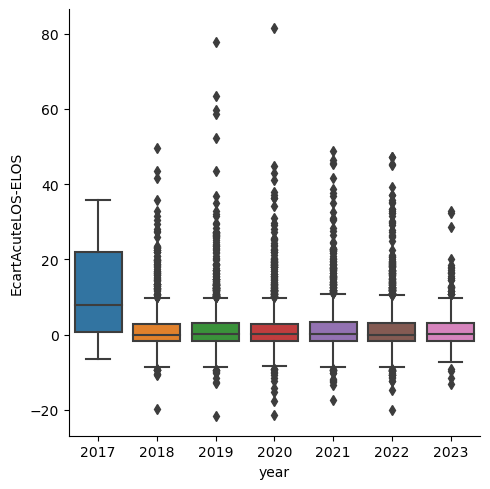

In [12]:
sns.catplot(data=data1_3, x="year", y="EcartAcuteLOS-ELOS", kind="box")

In [24]:
dat23 = data1_2.groupby("DischargeNursingAreaUnitDesc").describe()["EcartAcuteLOS-ELOS"][data1_2.groupby("DischargeNursingAreaUnitDesc").describe()["EcartAcuteLOS-ELOS"]["count"]>10]

In [32]:
dat24 = dat23.sort_values(by="mean")

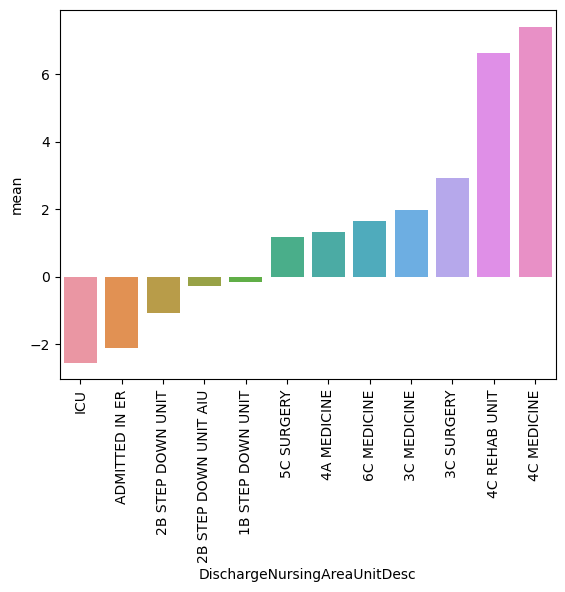

In [33]:
plt.xticks(rotation=90)
sns.barplot(x=dat24.index,y=dat24["mean"]);

Distribution of differences in Length of Stay by Departments.

In [6]:
data1_2.groupby("DischargeNursingAreaUnitDesc").describe()["EcartAcuteLOS-ELOS"][data1_2.groupby("DischargeNursingAreaUnitDesc").describe()["EcartAcuteLOS-ELOS"]["count"]>10]

,count,mean,std,min,25%,50%,75%,max
DischargeNursingAreaUnitDesc,,,,,,,,
1B STEP DOWN UNIT,97.0,-0.161856,3.204601,-9.0,-1.7,-0.50,0.70,11.8
2B STEP DOWN UNIT,38.0,-1.084211,2.920989,-7.8,-2.2,-0.95,-0.50,11.6
2B STEP DOWN UNIT AIU,17.0,-0.288235,3.639348,-10.8,-0.6,-0.20,1.10,8.2
3C MEDICINE,1223.0,1.977024,6.479641,-19.8,-1.6,0.30,3.70,58.6
3C SURGERY,639.0,2.926917,10.850860,-21.7,-1.6,0.40,4.80,204.5
4A MEDICINE,2095.0,1.311981,4.594142,-11.5,-1.1,0.30,2.65,77.7
4C MEDICINE,288.0,7.414236,12.734249,-10.7,-1.0,4.60,13.20,63.5
4C REHAB UNIT,104.0,6.633654,9.090010,-9.5,0.3,4.45,11.60,48.7
5C SURGERY,615.0,1.184390,5.983780,-9.7,-2.0,-0.30,2.40,47.3


In [25]:
data1_4 = data1_2[(data1_2["DischargeNursingAreaUnitDesc"] ==  "ICU") | (data1_2["DischargeNursingAreaUnitDesc"] ==  "4C MEDICINE") | (data1_2["DischargeNursingAreaUnitDesc"] ==  "4C REHAB UNIT") | (data1_2["DischargeNursingAreaUnitDesc"] ==  "3C MEDICINE") | (data1_2["DischargeNursingAreaUnitDesc"] ==  "3C SURGERY")]

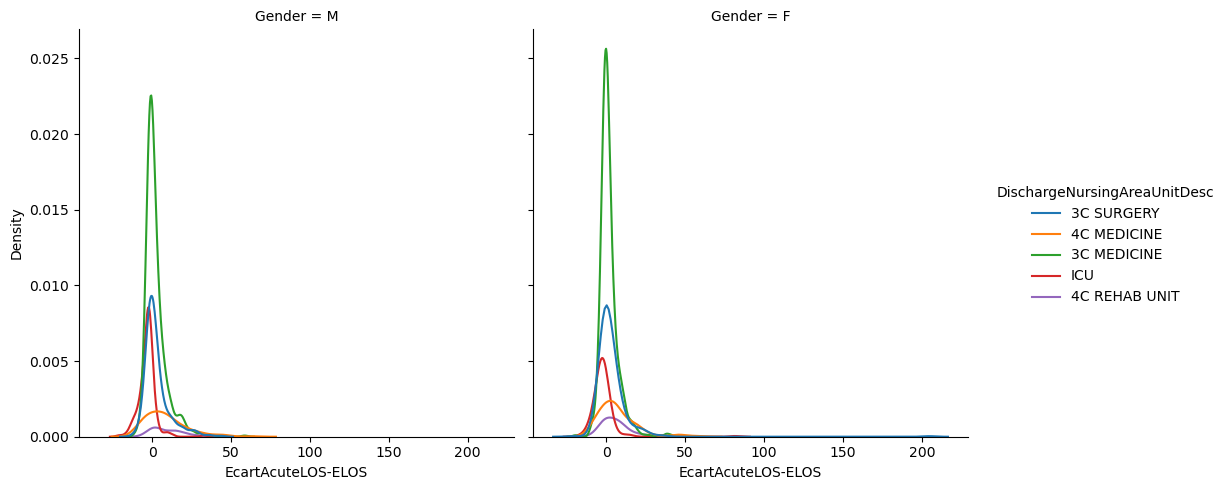

In [29]:
sns.displot(data1_4, x="EcartAcuteLOS-ELOS", hue="DischargeNursingAreaUnitDesc", kind="kde",col = "Gender")

Diagnosis was a major factor correlated with the differences in the number of days of care (Length of Stay).
The following table gives us the HIG Diagnostics with the most AcuteLOS-ELOS in terms of median.

In [27]:
data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]<5].head(25) 



,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Amputation of Hand/Foot,2.0,35.350000,11.525841,27.2,31.275,35.35,39.425,43.5
Cardiac Valve Replacement,1.0,17.200000,NaN,17.2,17.200,17.20,17.200,17.2
Amputation of Limb except Hand/Foot,1.0,16.100000,NaN,16.1,16.100,16.10,16.100,16.1
Fixation/Repair of Shoulder Joint,1.0,12.900000,NaN,12.9,12.900,12.90,12.900,12.9
Eye Intervention with Trauma/Complication of Treatment,1.0,7.500000,NaN,7.5,7.500,7.50,7.500,7.5
Closed Knee Intervention except Fixation without Infection,2.0,6.950000,3.606245,4.4,5.675,6.95,8.225,9.5
Fixation of Lower Limb except Ankle/Foot,4.0,4.025000,8.250808,-4.7,-0.200,2.90,7.125,15.0
Craniofacial Bone Intervention with Musculoskeletal Diagnosis,1.0,2.400000,NaN,2.4,2.400,2.40,2.400,2.4
Angina (except Unstable)/Chest Pain with Coronary Angiogram with Comorbid Cardiac Conditions,2.0,1.800000,1.979899,0.4,1.100,1.80,2.500,3.2


In [24]:
data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False).head(25) 



,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Amputation of Hand/Foot,2.0,35.350000,11.525841,27.2,31.275,35.35,39.425,43.5
Cardiac Valve Replacement,1.0,17.200000,NaN,17.2,17.200,17.20,17.200,17.2
Amputation of Limb except Hand/Foot,1.0,16.100000,NaN,16.1,16.100,16.10,16.100,16.1
Colostomy/Enterostomy,15.0,11.826667,15.711118,-17.4,0.850,15.50,23.500,33.0
Fixation/Repair of Shoulder Joint,1.0,12.900000,NaN,12.9,12.900,12.90,12.900,12.9
Fixation/Repair Hip/Femur,39.0,13.194872,13.371276,-13.4,6.250,11.80,19.050,52.3
Ear/Nose/Throat Malignancy,6.0,15.616667,22.960089,-3.4,0.325,10.00,18.550,58.6
Endoscopic Large Intestine/Rectum Resection without Colostomy,5.0,15.040000,12.848074,2.4,5.500,9.80,27.000,30.5
Eye Intervention with Trauma/Complication of Treatment,1.0,7.500000,NaN,7.5,7.500,7.50,7.500,7.5


In [37]:
data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]>5].head(20) 

,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Colostomy/Enterostomy,15.0,11.826667,15.711118,-17.4,0.850,15.50,23.500,33.0
Fixation/Repair Hip/Femur,39.0,13.194872,13.371276,-13.4,6.250,11.80,19.050,52.3
Ear/Nose/Throat Malignancy,6.0,15.616667,22.960089,-3.4,0.325,10.00,18.550,58.6
Convalescence,79.0,8.140506,10.399858,-0.2,1.800,5.40,10.750,63.5
Cardiac Conduction System Intervention,7.0,6.900000,7.795725,-5.8,3.550,4.90,12.050,18.0
Cancer of Bladder,12.0,5.858333,9.790112,-3.2,-2.125,4.20,9.400,30.9
"Cardiac Valve Disease, except Endocarditis",64.0,6.229688,9.213391,-10.3,0.525,4.10,12.700,37.2
Disorder of Adult Personality Behaviour,10.0,2.680000,5.309907,-6.1,-1.900,3.90,6.200,9.4
"Diabetes with ophthalmic, neurological, or circulatory complications",14.0,3.571429,4.330825,-3.4,1.175,3.75,5.825,11.7


Text(0.5, 1.0, 'HIG_Diagnosis_with_Highest_Median_EcartLOS-ELOS')

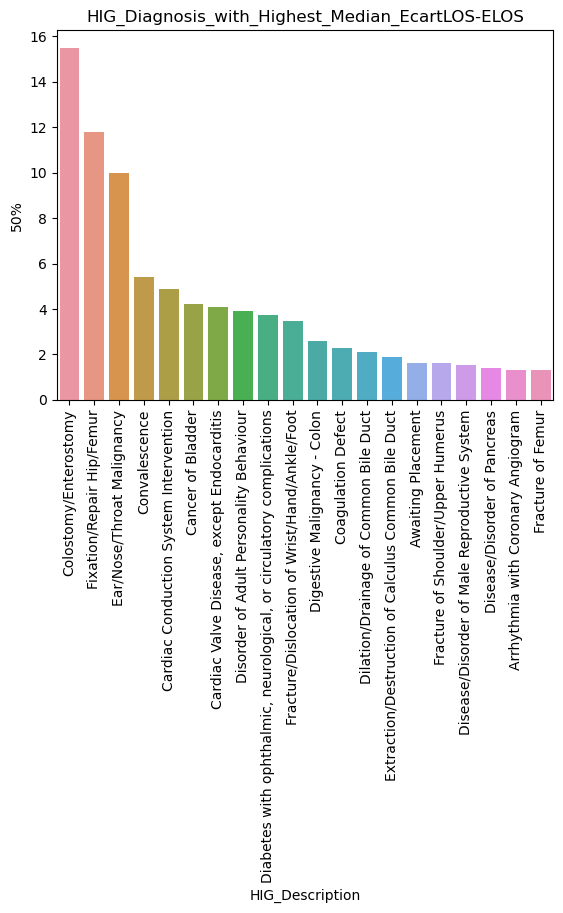

In [48]:
plt.xticks(rotation=90)
sns.barplot(x=dat.index,y=dat["50%"])
plt.title("HIG_Diagnosis_with_Highest_Median_EcartLOS-ELOS")

The following table gives us the average and median differences (LOS-ELOS) about the different groups of MCC diseases

In [7]:
data1_2.groupby("MCC_Description").describe()["EcartAcuteLOS-ELOS"][data1_2.groupby("MCC_Description").describe()["EcartAcuteLOS-ELOS"]["count"]>10].sort_values(by="50%",ascending=False)

,count,mean,std,min,25%,50%,75%,max
MCC_Description,,,,,,,,
Other Reasons for Hospitalization,98.0,6.987755,9.747199,-3.7,1.300,4.70,9.775,63.5
"Diseases & Disorders of the Kidney, Urinary Tract & Male Reproductive System",30.0,3.396667,7.670835,-3.2,-1.925,1.60,3.175,30.9
Diseases & Disorders of the Musculoskeletal System & Connective Tissue,119.0,2.273109,6.148676,-4.7,-1.200,0.80,3.800,43.0
"Significant Trauma, Injury, Poisoning & Toxic Effects of Drugs",315.0,3.547937,9.202832,-13.4,-2.200,0.80,6.900,52.3
Pregnancy & Childbirth,11.0,1.127273,2.263666,-1.1,-0.550,0.30,2.300,5.9
"Diseases & Disorders of Ear, Nose, Mouth & Throat",253.0,1.454941,5.088825,-4.8,-0.700,0.30,2.100,58.6
Diseases & Disorders of the Circulatory System,1443.0,1.573527,4.857253,-17.6,-0.900,0.30,2.900,43.5
Diseases & Disorders of the Hepatobiliary System & Pancreas,465.0,2.072258,7.528728,-15.3,-1.700,0.30,3.500,44.9
Diseases & Disorders of the Digestive System,205.0,2.937073,8.534227,-17.4,-2.200,0.10,5.500,35.2


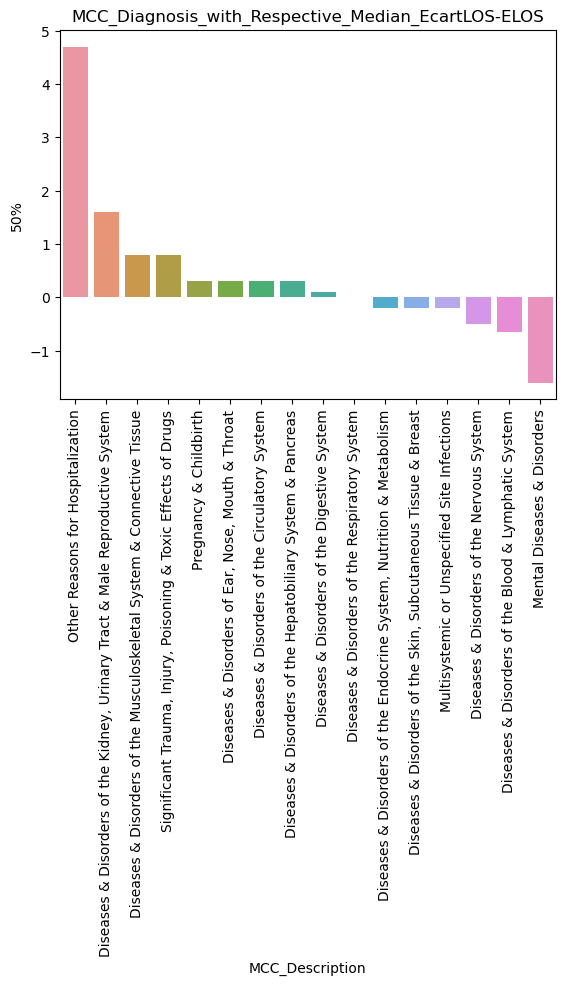

In [171]:
plt.xticks(rotation=90)
sns.barplot(x=dat1.index,y=dat1["50%"])
plt.title("MCC_Diagnosis_with_Respective_Median_EcartLOS-ELOS");

Patients were divided into three groups, according to the Acute LOS-ELOS gap: A (less than 7 days),
B (7 days or more and less than 14 days), and C (14 days or more).
Patients with a gap of more than 14 days represent 4.63% of the population while those with a gap between 7 and 14 days represent 7.8% of the population.

The table shows that, compared to patients with a shorter LOS, long-term hospitalized patients
Included a higher level of comorbidity and were older among others.
With an increase in LOS, patients are exposed to a higher risk of infections and the level
Comorbidity increases accordingly.

Group C

In [13]:
data1_2[data1_2["EcartAcuteLOS-ELOS"]>=14].describe()[["ageNumber","EcartAcuteLOS-ELOS","ComorbidityLevel"]]

,ageNumber,EcartAcuteLOS-ELOS,ComorbidityLevel
count,345.000000,345.000000,345.000000
mean,74.084058,23.741739,2.727536
std,13.508456,13.790589,1.285415
min,23.000000,14.000000,0.000000
25%,66.000000,16.800000,2.000000
50%,76.000000,19.800000,3.000000
75%,85.000000,26.800000,4.000000
max,107.000000,204.500000,4.000000


Group B

In [14]:
data1_2[(data1_2["EcartAcuteLOS-ELOS"]>=7) & (data1_2["EcartAcuteLOS-ELOS"]<14)].describe()[["ageNumber","EcartAcuteLOS-ELOS","ComorbidityLevel"]]

,ageNumber,EcartAcuteLOS-ELOS,ComorbidityLevel
count,581.000000,581.000000,581.000000
mean,72.958692,9.657487,2.117040
std,14.551514,1.968940,1.326157
min,22.000000,7.000000,0.000000
25%,65.000000,8.000000,1.000000
50%,75.000000,9.300000,2.000000
75%,83.000000,11.100000,3.000000
max,102.000000,13.900000,4.000000


Group A

In [30]:
data1_2[(data1_2["EcartAcuteLOS-ELOS"]<7) & (data1_2["EcartAcuteLOS-ELOS"]>0)].describe()[["ageNumber","EcartAcuteLOS-ELOS","ComorbidityLevel"]]

,ageNumber,EcartAcuteLOS-ELOS,ComorbidityLevel
count,2547.000000,2831.000000,2831.000000
mean,68.450726,2.444507,1.196044
std,16.079054,1.854694,1.262142
min,18.000000,0.100000,0.000000
25%,59.000000,0.900000,0.000000
50%,71.000000,2.000000,1.000000
75%,81.000000,3.700000,2.000000
max,104.000000,6.900000,8.000000


The following tables show the differences between family practice and internal medicine groups,
Readmissions groups, age and sex groups.

In [16]:
data1_2.groupby(by="ProviderServiceDesc").describe()[["EcartAcuteLOS-ELOS","RIW"]]

EcartAcuteLOS-ELOS                            \
                                              count      mean       std   min   
ProviderServiceDesc                                                             
Emergency Medicine                              1.0 -3.000000       NaN  -3.0   
Family Practice/General Practice             5629.0  2.028531  7.113213 -21.7   
Internal Medicine                            1809.0  0.558928  6.242830 -17.6   
Practitioner Nursing                            1.0  7.500000       NaN   7.5   

                                                           RIW             \
                                  25%  50%  75%    max   count       mean   
ProviderServiceDesc                                                         
Emergency Medicine               -3.0 -3.0 -3.0   -3.0     1.0   0.643400   
Family Practice/General Practice -1.5  0.3  3.5  204.5  5629.0   1.602552   
Internal Medicine                -2.2 -0.5  2.0   81.4  1809.0   1.430730   
Practitioner Nursing              7.5  7.5  7.5    7.5     1.0  19.046400   

                                                                       \
                                       std      min      25%      50%   
ProviderServiceDesc                                                     
Emergency Medicine                     NaN   0.6434   0.6434   0.6434   
Family Practice/General Practice  2.892942   0.1430   0.5891   0.8534   
Internal Medicine                 1.950738   0.1097   0.5347   0.8276   
Practitioner Nursing                   NaN  19.0464  19.0464  19.0464   

                                                    
                                      75%      max  
ProviderServiceDesc                                 
Emergency Medicine                 0.6434   0.6434  
Family Practice/General Practice   1.4837  56.3799  
Internal Medicine                  1.4610  19.0650  
Practitioner Nursing              19.0464  19.0464

Hypothesis test between patients in general medicine and those in internal medicine. We found a significant difference.

In [19]:
import scipy.stats as stats
stats.mannwhitneyu(x=InternalMed["EcartAcuteLOS-ELOS"], y=FamilyPratice["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=4296883.0, pvalue=1.5123401795978998e-23)

New patients have lower mean gap (LOS-ELOS) (1.17 days) than patients with readmissions within 7 days (2.65 days) and planned readmission (5.27 days).

Distribution of differences (LOS-ELOS) and RIW by readmission status

In [165]:
data1_2.groupby(by="ReAdmitCodeDesc").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
ReAdmitCodeDesc,,,,,,,,
<= 7 days; unplanned readmission (from day surgery) and readmission diagnosis is the same/related to the previous admission,9.0,-0.888889,2.630800,-4.7,-2.400,-1.4,0.30,3.0
Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,292.0,2.175000,7.263823,-19.8,-1.700,0.6,3.50,43.5
Acute <= 7 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission,134.0,2.651493,9.084364,-10.7,-1.925,0.1,3.45,59.6
New patient to the acute care unit,2967.0,1.172363,5.887565,-21.7,-1.700,-0.1,2.50,49.6
"None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission",3960.0,1.909646,7.414161,-21.3,-1.600,0.2,3.30,204.5
Planned readmission from previous acute care (no time restriction)(admit category maybe L - elective or U - urgent/emergent),78.0,5.271795,10.919444,-10.7,-0.275,3.4,9.55,63.5


Hypothesis testing between new patients and those who return after 28 days or whose readmission is not linked to the previous admission.

In [22]:
stats.mannwhitneyu(x=NewPat["EcartAcuteLOS-ELOS"], y=NoneAbove["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=5512897.0, pvalue=1.1201507855617638e-05)

GENDER AND AGE GROUPS
Women have a larger average gap than men (1.7 versus 1.6). However, this difference is not significant.
Age
Patients in age group 3 have a larger average gap than those in group 2 (2 days versus 1 day).

In [23]:
data1_2.groupby(by="Gender").describe()[["EcartAcuteLOS-ELOS","RIW"]]

EcartAcuteLOS-ELOS                                                  \
                    count      mean       std   min  25%  50%  75%    max   
Gender                                                                      
F                  3781.0  1.727347  7.210461 -21.7 -1.6  0.1  3.3  204.5   
M                  3659.0  1.613310  6.648455 -21.3 -1.7  0.0  2.9   63.5   

           RIW                                                               
         count      mean       std     min     25%     50%     75%      max  
Gender                                                                       
F       3781.0  1.457315  2.271819  0.1550  0.5591  0.8363  1.4610  50.6376  
M       3659.0  1.672188  3.081427  0.1097  0.5874  0.8534  1.4996  56.3799

In [24]:
data1_2.groupby(by="AgeGroup").describe()[["EcartAcuteLOS-ELOS","RIW"]]

EcartAcuteLOS-ELOS                                               \
                      count      mean        std   min    25%  50%   75%   
AgeGroup                                                                   
1                       3.0 -8.133333  11.751737 -21.7 -11.65 -1.6 -1.35   
2                    3503.0  1.061433   5.873812 -20.1  -1.70 -0.2  2.10   
3                    3934.0  2.221759   7.719261 -21.3  -1.60  0.4  4.10   

                    RIW                                                       \
            max   count      mean       std     min      25%     50%     75%   
AgeGroup                                                                       
1          -1.1     3.0  1.744367  2.134471  0.4449  0.51265  0.5804  2.3941   
2          81.4  3503.0  1.303956  2.345610  0.1097  0.53360  0.7427  1.1306   
3         204.5  3934.0  1.793507  2.966357  0.1781  0.64040  0.9675  1.8846   

                   
              max  
AgeGroup           
1          4.2078  
2         48.7631  
3         56.3799

<Axes: xlabel='AgeGroup', ylabel='mean'>

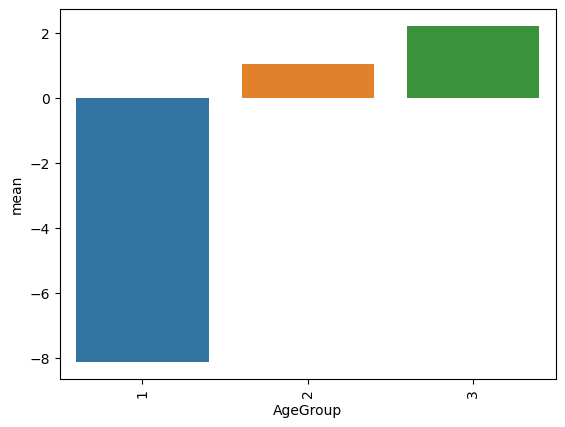

In [18]:
plt.xticks(rotation=90)
sns.barplot(x=dat2.index,y=dat2["EcartAcuteLOS-ELOS"]["mean"])

Hypothesis testing between patients in age group 2 and 3. We found a significant difference. Those in group 3 have larger gaps.

In [26]:
stats.mannwhitneyu(x=agegroup2["EcartAcuteLOS-ELOS"], y=agegroup3["EcartAcuteLOS-ELOS"], alternative = 'two-sided')

MannwhitneyuResult(statistic=6202509.5, pvalue=9.827316319678544e-14)

Postal Codes with the Biggest Count of patients

In [7]:
data1_2["CodePostalAbrege"].value_counts()

K1K    1233
K1J     755
K1L     748
K1C     669
K1N     624
       ... 
B2N       1
L7M       1
K8B       1
K7M       1
T5P       1
Name: CodePostalAbrege, Length: 151, dtype: int64

Postal Codes with the Highest Mean Ecart AcuteLOS-ELOS

In [6]:
data1_2.groupby("CodePostalAbrege").describe()["EcartAcuteLOS-ELOS"].sort_values(by="mean",ascending=False)[data1_2.groupby("CodePostalAbrege").describe()["EcartAcuteLOS-ELOS"].sort_values(by="mean",ascending=False)["count"]>5].head(20)


,count,mean,std,min,25%,50%,75%,max
CodePostalAbrege,,,,,,,,
K0B,52.0,3.221154,8.475393,-9.7,-0.175,1.30,5.625,52.3
K2A,27.0,3.114815,8.045242,-5.2,-1.900,2.00,4.100,32.9
K4C,70.0,2.890000,8.867644,-7.7,-1.475,-0.15,3.300,45.4
K2C,21.0,2.747619,7.435295,-8.5,-0.600,0.60,5.500,29.7
J8P,26.0,2.588462,5.839954,-3.0,-1.075,-0.65,5.475,19.9
K1H,24.0,2.558333,7.107248,-7.5,-2.400,1.95,4.450,25.8
K2G,23.0,2.473913,4.526911,-5.7,0.050,0.70,6.350,11.1
K6J,6.0,2.366667,3.940389,-1.4,-0.825,1.65,4.650,8.3
K2E,15.0,2.326667,5.978350,-4.5,-1.050,-0.50,3.700,18.8


In [10]:
data1_3 = data1_2[data1_2["EcartAcuteLOS-ELOS"]>=7]

In [12]:
data1_3.groupby("CodePostalAbrege").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
CodePostalAbrege,,,,,,,,
K1K,147.0,13.685034,6.637795,7.0,8.850,11.70,16.500,49.6
K1J,112.0,14.346429,7.821890,7.0,8.400,12.10,17.900,48.7
K1L,101.0,15.185149,10.706581,7.0,8.700,11.80,16.800,77.7
K1C,83.0,14.730120,9.271182,7.0,8.100,10.80,18.050,47.3
K1N,77.0,15.753247,10.270558,7.0,8.600,13.00,18.700,59.6
K4A,65.0,14.478462,7.151846,7.0,8.800,12.10,18.200,41.1
K4K,63.0,14.949206,9.418305,7.1,8.650,10.70,17.400,43.6
K0A,58.0,15.589655,12.666542,7.1,8.950,11.60,17.325,81.4
K1E,25.0,13.212000,8.003505,7.0,7.800,9.00,16.400,35.2


In [54]:
da1

,count,mean,std,min,25%,50%,75%,max
CodePostalAbrege,,,,,,,,
K1K,1233.0,1.552960,5.828644,-19.8,-1.700,0.20,3.300,49.6
K1J,755.0,2.024503,6.613391,-20.1,-1.500,0.30,3.450,48.7
K1L,748.0,1.776337,7.144033,-21.3,-1.500,0.00,2.900,77.7
K1C,669.0,1.704933,6.522969,-12.8,-1.600,0.10,3.100,47.3
K1N,624.0,1.530128,7.156034,-14.7,-2.000,0.05,3.225,59.6
K0A,566.0,1.634276,6.828723,-12.0,-1.600,0.15,3.000,81.4
K4A,483.0,1.797930,6.273503,-12.5,-1.600,0.10,3.100,41.1
K4K,431.0,1.991647,6.989825,-10.1,-1.500,0.30,3.150,43.6
K1E,244.0,0.818443,5.662419,-12.4,-1.900,-0.60,2.500,35.2


In [55]:
data1_4 = data1_2[data1_2["EcartAcuteLOS-ELOS"]>7]

In [57]:
da2 = data1_4.groupby("CodePostalAbrege").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False)[data1_4.groupby("CodePostalAbrege").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False)["count"]>5].head(20)

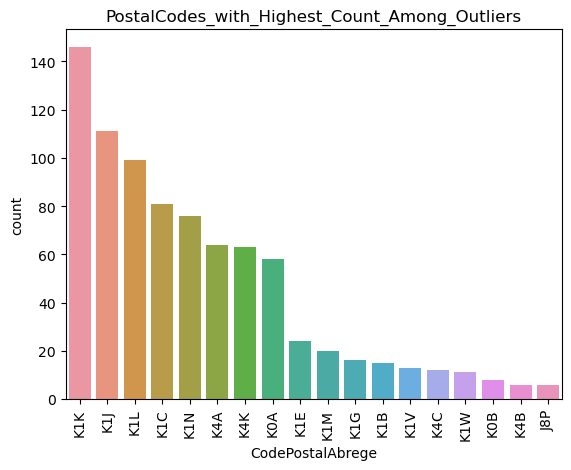

In [58]:
plt.xticks(rotation=90)
sns.barplot(x=da2.index,y=da2["count"])
plt.title("PostalCodes_with_Highest_Count_Among_Outliers");

In [34]:
d3 = d1.merge(d2,on="index")

In [39]:
d4 = d3.rename(columns={"CodePostalAbrege_x": "OutlierProportion", "CodePostalAbrege_y": "NonOutlierProportion"})

In [41]:
d4["Difference_Between_Outlier_and_NonOutlier_Proportions"] = d4["OutlierProportion"] - d4["NonOutlierProportion"]

Here, we focus on postal codes and their proportions among outliers and non-outliers.
If you look at the first line, the postal code is K1J represents 12% of cases among outliers (gap>7 days)
But represents only 10% of cases among non-outliers (gap<7 days).
K1J is then more present among outliers than non-outliers in terms of proportion.
It pushes towards more deviation than K0A, which is more present among non-outliers than outliers in terms of proportion.

In [44]:
d4.sort_values(by="Difference_Between_Outlier_and_NonOutlier_Proportions",ascending=False)

,index,OutlierProportion,NonOutlierProportion,Difference_Between_Outlier_and_NonOutlier_Proportions
1,K1J,12.095032,9.871047,2.223985
6,K4K,6.803456,5.649371,1.154085
2,K1L,10.907127,9.932453,0.974674
5,K4A,7.019438,6.416948,0.602490
13,K4C,1.295896,0.890390,0.405506
16,J8P,0.647948,0.307031,0.340917
10,K1G,1.727862,1.412343,0.315519
19,K2A,0.539957,0.337734,0.202223
33,K2K,0.215983,0.015352,0.200631
15,K0B,0.863931,0.675468,0.188463


In [46]:
d4.sort_values(by="Difference_Between_Outlier_and_NonOutlier_Proportions")

,index,OutlierProportion,NonOutlierProportion,Difference_Between_Outlier_and_NonOutlier_Proportions
7,K0A,6.263499,7.798588,-1.535089
0,K1K,15.874730,16.671784,-0.797054
11,K1B,1.619870,2.287381,-0.667511
8,K1E,2.699784,3.361990,-0.662206
48,J8T,0.107991,0.491250,-0.383258
31,K2P,0.323974,0.660117,-0.336143
37,K1Y,0.107991,0.337734,-0.229743
29,K2J,0.323974,0.506601,-0.182627
18,K4B,0.647948,0.813632,-0.165684
42,J9J,0.107991,0.230273,-0.122282


In [31]:
c2=data1_2[data1_2["EcartAcuteLOS-ELOS"]<7]["CodePostalAbrege"].value_counts(normalize=True)*100

In [32]:
d2 = c2.reset_index()

In [27]:
c1 = data1_2[data1_2["EcartAcuteLOS-ELOS"]>=7]["CodePostalAbrege"].value_counts(normalize=True)*100

In [29]:
d1 = c1.reset_index()

The following tables give us an overview of secondary and main diagnoses with greater gaps.

PRE-ADMIT DIAGNOSIS ANALYSIS

Pre-Admit diagnoses with the highest median gap.

In [ ]:
pre_adata.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[pre_adata.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]>10].head(20)

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=dat4.index,y=dat4["50%"])
plt.title("Pre_Admit_Diagnosis_with_Highest_Median_EcartLOS-ELOS");

Pre-Admit Diagnostics that are most present present among Outliers

In [ ]:
predata = data1_1[data1_1["DiagnosisTypeDesc"] == "Pre-Admit Comorbidity"]

In [ ]:
out_predata = predata[predata["EcartAcuteLOS-ELOS"] >7]

In [ ]:
da4 = out_predata.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=da4.index,y=da4["count"])
plt.title("Pre_Admit_Diagnosis_with_Highest_Count_Among_Outliers");

Pre-Admit Diagnostics that are most present among the population

In [ ]:
data1_1[data1_1["DiagnosisTypeDesc"] == "Pre-Admit Comorbidity"].groupby("DiagnosisCodeDesc").describe()["EcartAcute-ELOS"].sort_values(by="count",ascending=False).head(20)

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=dat5.index,y=dat5["count"])
plt.title("Pre_Admit_Diagnosis_with_Highest_Count");

Here, we will look at the difference between patients with very frequent diagnoses but with deviations < 7 and > 7 days.
The objective here is to highlight the differences between these two groups and to be able to explain why some of these patients stay longer than expected.

It is known that most patients with these main HIG diagnoses have small differences LOS-ELOS (between 0 and 2 days). However, there are up to 20% of these patients who have fairly large gaps.

The 2 tables then allow us to say that patients with these main diagnoses but having the pre-admit more present in outliers and therefore whose difference Outlier and Non-Outlier is positive are more likely to be outliers than those whose difference between Outlier and Non-outlier is negative.

Outliers Proportions represents the number of patients with significant deviations (greater than 7 days) with these pre-admit diagnoses in terms of percentage.

Non Outlier Proportions represents the number of patients with small deviations (less than 7 days) with this pre-admit diagnosis in terms of percentage.

If we look at the first line, Palliative Care represents 3.9% of cases among outliers (ecarts>7 days)
But represents only 2% of cases among non-outliers (deviations<7 days).
Palliative Care is then more present among outliers than non-outliers in terms of proportion.
It pushes towards more deviation than Hypokalaemia which is more present among non-outliers than outliers in terms of proportion.

In [30]:
s31.sort_values(by="DifferenceBetweenOutlierAndNonOutlier",ascending=False).head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
Palliative care,3.903785,2.059202,1.844583
Congestive heart failure,3.864353,2.950203,0.914150
Cachexia,1.537855,0.663301,0.874554
Delirium superimposed on dementia,1.892744,1.039501,0.853243
"Other specified disorders of muscle, multiple sites",1.616719,0.940501,0.676218
"Delirium, unspecified",1.656151,1.108801,0.547350
"Anaemia, unspecified",1.537855,1.009801,0.528054
Retention of urine,1.064669,0.594001,0.470668
Other and unspecified dysphagia,1.182965,0.722701,0.460265
"Depressive episode, unspecified",0.591483,0.158400,0.433082


In [ ]:
Here, we looked at pre-admits more present among non-outliers.

In [34]:
s31.sort_values(by="DifferenceBetweenOutlierAndNonOutlier").head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
Hypokalaemia,2.405363,3.831304,-1.425941
"Acute renal failure, unspecified",5.007886,6.336006,-1.328120
"Pneumonia, unspecified",0.788644,1.989902,-1.201258
Benign hypertension,3.785489,4.771805,-0.986316
"Bronchopneumonia, unspecified",2.247634,3.217503,-0.969869
Constipation,2.287066,2.930403,-0.643337
Gastroenteritis and colitis of unspecified origin,0.197161,0.742501,-0.545340
Dehydration,0.433754,0.841501,-0.407747
Type 2 diabetes mellitus without (mention of) complications,0.749211,1.148401,-0.399190
Acidosis,0.157729,0.504901,-0.347172


Here, we took the first 5 pre-admit diagnosis of each table to be able to visually highlight the differences between these two groups.

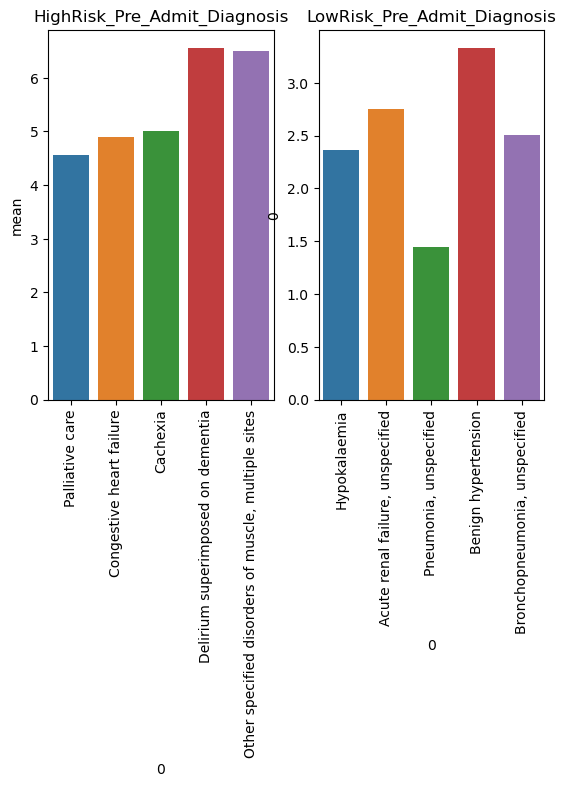

In [159]:
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.barplot(x=db.iloc[:,0],y=db.iloc[:,1])
plt.ylabel("mean")
plt.title("HighRisk_Pre_Admit_Diagnosis")
plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x=d.iloc[:,0],y=d.iloc[:,1])
plt.title("LowRisk_Pre_Admit_Diagnosis");

SECONDARY DIAGNOSIS ANALYSIS

Secondary diagnostics with the highest median deviations

In [31]:
secon_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[secon_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]>10].head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Enterococcus as the cause of diseases classified to other chapters,49.0,10.479592,10.810353,-6.5,3.300,8.00,16.400,52.3
Person awaiting admission to adequate facility elsewhere,19.0,9.536842,11.724486,-9.5,0.700,7.40,19.700,29.7
Other waiting period for investigation and treatment,24.0,9.704167,14.014821,-11.6,3.225,6.25,11.300,63.5
"Streptococcus Group G, as the cause of diseases classified to other chapters",11.0,5.536364,5.406158,-3.5,1.500,5.90,9.350,14.1
Encephalopathy in diseases classified elsewhere,44.0,7.459091,13.187403,-15.3,-1.825,5.10,12.550,38.7
Pseudomonas (aeruginosa) as the cause of diseases classified to other chapters,50.0,8.128000,12.730792,-12.4,-1.000,4.75,12.450,41.7
Proteus (mirabilis)(morganii) as the cause of diseases classified to other chapters,38.0,7.155263,10.303678,-8.5,0.750,4.70,9.775,45.0
Contact with and exposure to other communicable diseases,16.0,6.493750,9.330771,-4.7,1.125,4.45,11.050,32.4
Other and unspecified symptoms and signs involving cognitive functions and awareness,24.0,4.962500,7.540316,-5.8,-1.025,4.45,7.700,26.4


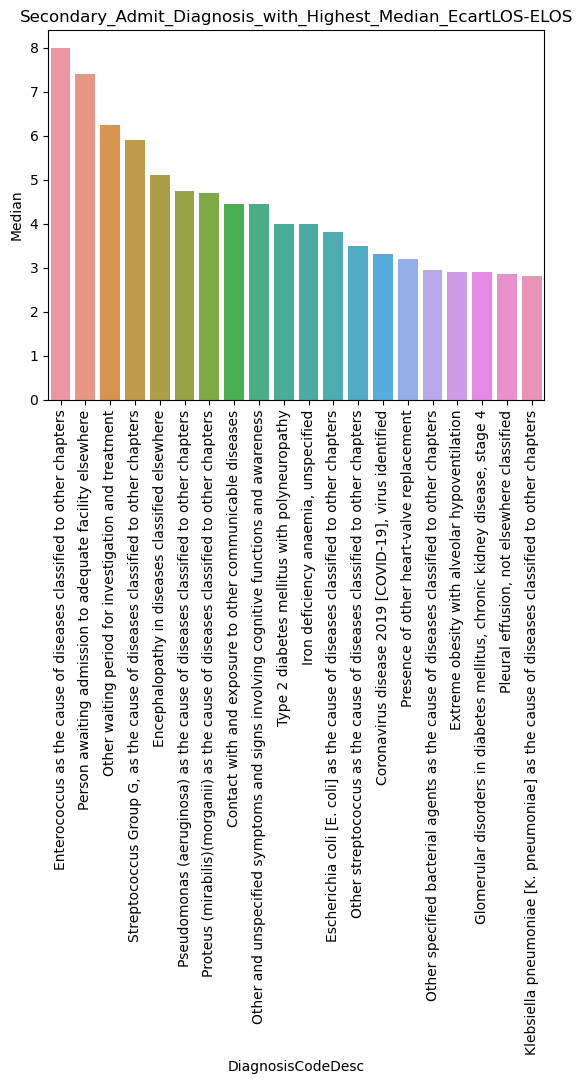

In [167]:
plt.xticks(rotation=90)
sns.barplot(x=dat7.index,y=dat7["50%"])
plt.title("Secondary_Admit_Diagnosis_with_Highest_Median_EcartLOS-ELOS")
plt.ylabel("Median");

Secondary Diagnostics that most often come back among Outliers

In [22]:
data1_8.groupby("DiagnosisCodeDesc").describe()["EcartAcute-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Benign hypertension,388.0,14.689691,12.739436,7.1,8.675,11.10,16.650,204.5
Special screening examination for other viral diseases,97.0,14.597938,8.201626,7.1,8.700,11.80,18.600,47.3
Type 2 diabetes mellitus with other specified kidney complication not elsewhere classified,83.0,16.034940,11.590560,7.1,8.650,12.00,18.750,77.7
Type 2 diabetes mellitus with certain circulatory complications,78.0,15.225641,9.926777,7.3,9.050,11.50,16.725,59.6
Escherichia coli [E. coli] as the cause of diseases classified to other chapters,57.0,21.300000,27.078853,7.1,10.300,14.30,21.100,204.5
Type 2 diabetes mellitus without (mention of) complications,42.0,14.128571,9.987487,7.1,8.650,11.75,16.275,63.5
Unspecified dementia,41.0,16.036585,10.439558,7.3,8.900,12.60,18.300,45.7
"Obesity, unspecified",40.0,16.062500,12.898990,7.2,9.525,12.25,17.575,77.7
Unspecified glomerular disorders in diabetes mellitus,40.0,16.745000,13.044617,7.2,9.475,13.90,18.550,77.7


Secondary Diagnostics that come back most often among the population

In [29]:
data1_1[data1_1["DiagnosisTypeDesc"] == "Secondary"].groupby("DiagnosisCodeDesc").describe()["EcartAcute-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Benign hypertension,3136.0,1.682207,7.259017,-21.3,-1.700,0.10,3.300,204.5
Type 2 diabetes mellitus without (mention of) complications,622.0,0.579743,5.287308,-10.7,-1.875,-0.40,1.675,63.5
Special screening examination for other viral diseases,594.0,2.495118,7.019762,-11.3,-1.400,0.90,4.875,47.3
Type 2 diabetes mellitus with certain circulatory complications,449.0,3.063474,7.531351,-10.8,-1.100,1.10,5.500,59.6
Type 2 diabetes mellitus with other specified kidney complication not elsewhere classified,401.0,3.536908,8.845032,-14.7,-1.000,1.30,5.800,77.7
"Sleep apnoea, obstructed",269.0,1.995539,5.564169,-19.8,-1.400,0.80,3.800,24.1
"Obesity, unspecified",241.0,3.020332,8.170279,-6.6,-0.900,0.90,3.900,77.7
Personal history of noncompliance with medical treatment and regimen,225.0,1.646222,6.318538,-11.3,-1.600,0.10,3.400,43.5
Unspecified glomerular disorders in diabetes mellitus,214.0,3.547664,8.933887,-10.5,-1.700,1.15,5.475,77.7


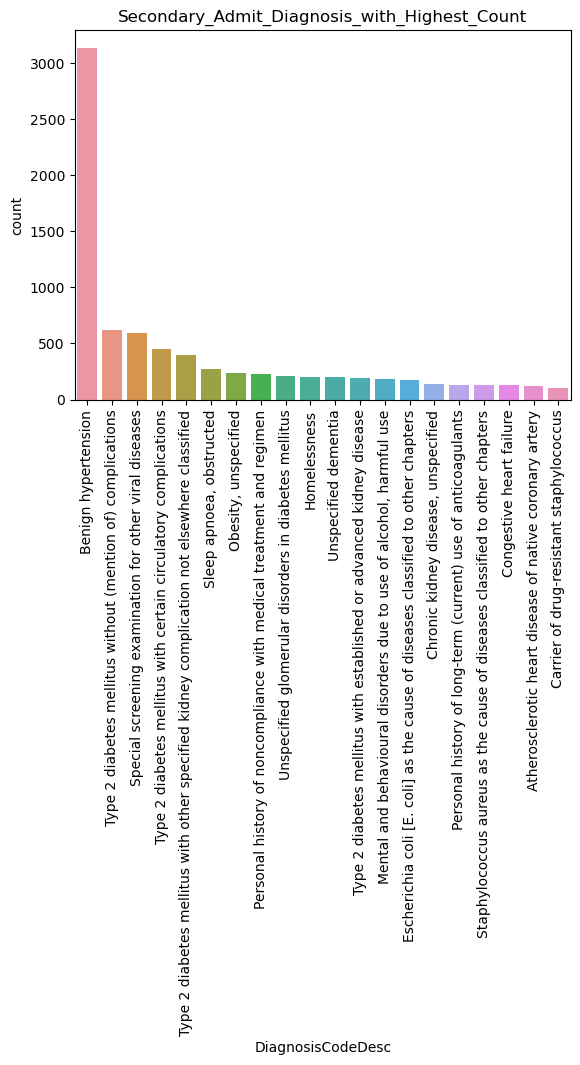

In [168]:
plt.xticks(rotation=90)
sns.barplot(x=dat6.index,y=dat6["count"])
plt.title("Secondary_Admit_Diagnosis_with_Highest_Count");

Here, we will look at the difference between patients with very frequent diagnoses but with deviations < 7 and > 7 days.
The objective here is to highlight the differences between these two groups in terms of Secondary diagnoses and to explain why some of these patients stay longer than expected.

In [33]:
s61.sort_values(by="DifferenceBetweenOutlierAndNonOutlier",ascending=False).head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
Escherichia coli [E. coli] as the cause of diseases classified to other chapters,2.388638,0.946337,1.442301
Enterococcus as the cause of diseases classified to other chapters,1.162040,0.167001,0.995039
Other specified bacterial agents as the cause of diseases classified to other chapters,1.291156,0.334001,0.957154
Encephalopathy in diseases classified elsewhere,1.226598,0.278334,0.948263
Type 2 diabetes mellitus with other specified kidney complication not elsewhere classified,3.938025,2.994879,0.943146
Staphylococcus aureus as the cause of diseases classified to other chapters,1.484829,0.556669,0.928160
Pseudomonas (aeruginosa) as the cause of diseases classified to other chapters,0.903809,0.267201,0.636608
Carrier of drug-resistant staphylococcus,1.291156,0.701403,0.589753
"Chronic kidney disease, unspecified",1.420271,0.890670,0.529601
Constipation,0.645578,0.322868,0.322710


In [35]:
s61.sort_values(by="DifferenceBetweenOutlierAndNonOutlier").head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
Benign hypertension,18.011620,25.684703,-7.673082
Type 2 diabetes mellitus without (mention of) complications,1.872176,5.555556,-3.683380
"Mental and behavioural disorders due to use of alcohol, harmful use",0.710136,1.647740,-0.937604
Homelessness,0.839251,1.625473,-0.786222
"Sleep apnoea, obstructed",1.484829,2.226676,-0.741847
Atherosclerotic heart disease of native coronary artery,0.581020,1.091071,-0.510051
"Obesity, unspecified",1.613944,2.004008,-0.390064
"Mental and behavioural disorders due to use of cocaine, harmful use",0.129116,0.389668,-0.260553
"Mental and behavioural disorders due to use of cannabinoids, harmful use",0.129116,0.345135,-0.216019
Personal history of noncompliance with medical treatment and regimen,1.613944,1.825874,-0.211929


POST-ADMIT DIAGNOSIS ANALYSIS

In [7]:
postad_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[postad_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]>5].head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
"Infection following a procedure, not elsewhere classified",6.0,22.433333,7.990661,11.8,16.800,23.35,29.075,30.5
"Decubitus ulcer and pressure area, unspecified",13.0,25.484615,22.197066,-3.6,11.500,23.10,34.300,77.7
Unspecified dementia,6.0,24.616667,13.497469,14.0,15.400,20.10,27.575,49.6
"Other disorders of electrolyte and fluid balance, not elsewhere classified",7.0,16.185714,12.263011,1.1,8.250,18.10,20.000,37.6
"Thrombocytopenia, unspecified",10.0,18.620000,9.903512,2.4,14.000,17.35,25.050,35.8
"Folate deficiency anaemia, unspecified",6.0,17.000000,15.178537,-1.5,5.800,17.00,26.625,37.6
Other and unspecified dysphagia,41.0,16.853659,14.421444,-5.5,8.100,16.40,22.700,59.6
Dehydration,18.0,14.694444,11.787604,-3.7,5.525,15.60,19.375,41.1
"Pneumonia, unspecified",14.0,13.335714,13.187559,-6.5,2.550,14.00,21.725,36.3


Text(0.5, 1.0, 'PostAdmit_Diagnosis_with_Highest_Median_EcartLOS-ELOS')

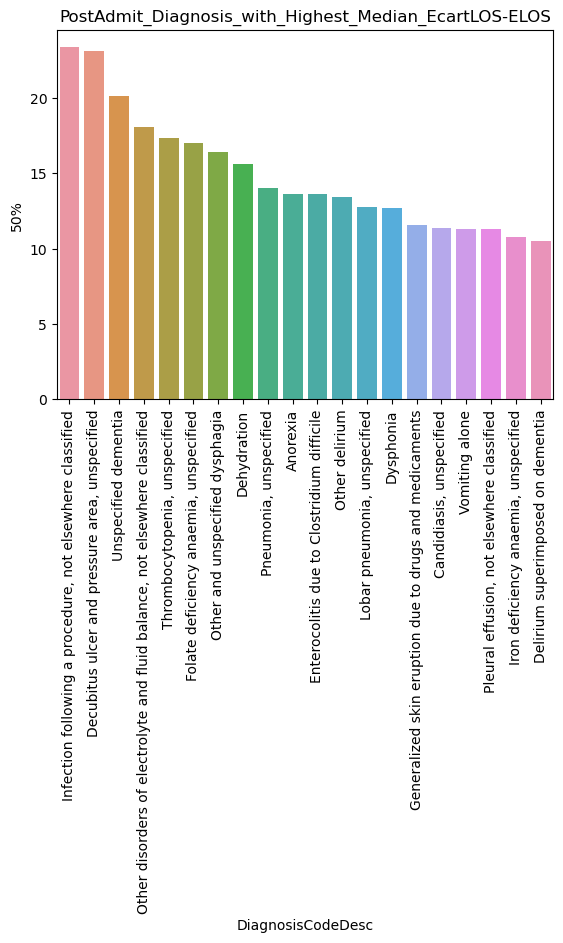

In [9]:
plt.xticks(rotation=90)
sns.barplot(x=dat20.index,y=dat20["50%"])
plt.title("PostAdmit_Diagnosis_with_Highest_Median_EcartLOS-ELOS")

PostAdmit Diagnostics that come back most often among Outliers

In [14]:
data21.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Constipation,121.0,18.154545,9.350686,7.2,10.500,15.90,23.000,47.1
Hypokalaemia,88.0,17.193182,9.554247,7.2,10.200,15.20,20.600,46.5
"Urinary tract infection, site not specified",70.0,20.328571,11.682418,7.3,10.825,18.00,26.250,52.3
"Acute renal failure, unspecified",60.0,18.463333,9.966094,7.2,10.425,15.90,23.300,47.3
"Other specified disorders of muscle, multiple sites",44.0,19.450000,13.146748,7.3,10.700,15.05,22.275,77.7
"Delirium, unspecified",41.0,19.000000,8.246151,7.6,12.500,17.10,22.800,38.0
"Hypotension, unspecified",40.0,17.815000,9.696353,7.3,11.825,16.50,20.150,52.3
Other and unspecified dysphagia,32.0,21.462500,12.895229,7.3,10.525,18.30,26.200,59.6
Hyperkalaemia,30.0,20.273333,10.064548,7.1,11.450,17.35,28.825,45.3


PostAdmit Diagnostics that come back most often among the population.

In [16]:
postad_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Constipation,294.0,7.889456,10.929594,-9.6,0.500,4.95,12.85,47.1
Hypokalaemia,205.0,8.243415,10.269292,-17.4,1.000,5.40,12.50,46.5
"Acute renal failure, unspecified",140.0,7.912857,11.777224,-17.4,0.125,5.40,14.35,47.3
"Urinary tract infection, site not specified",114.0,13.042982,13.222286,-8.5,4.500,9.85,18.95,52.3
"Hypotension, unspecified",83.0,8.065060,12.310470,-21.3,-0.450,5.90,15.80,52.3
"Delirium, unspecified",77.0,10.920779,10.756239,-5.0,2.600,9.20,17.30,38.0
"Other specified disorders of muscle, multiple sites",73.0,12.531507,13.400206,-1.1,2.000,10.00,18.20,77.7
Gastroenteritis and colitis of unspecified origin,71.0,7.063380,8.791900,-3.7,1.250,4.80,9.40,35.1
Hypo-osmolality and hyponatraemia,59.0,10.213559,10.982046,-7.1,0.750,6.60,17.85,43.6


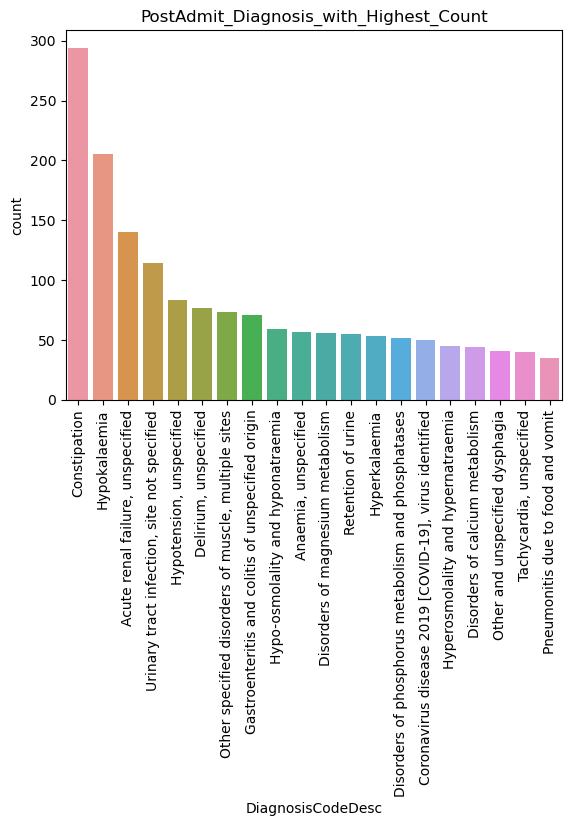

In [21]:
plt.xticks(rotation=90)
sns.barplot(x=data22.index,y=data22["count"])
plt.title("PostAdmit_Diagnosis_with_Highest_Count");

MOST RESPONSIBLE DIAGNOSIS ANALYSIS

The Most Responsible diagnoses with the highest median deviations

In [33]:
mostres_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)[mostres_data.groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="50%",ascending=False)["count"]>5].head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
"Intertrochanteric fracture, closed",36.0,12.511111,13.884704,-13.4,3.825,9.05,18.975,52.3
Stage IV decubitus [pressure] ulcer,7.0,9.814286,13.130934,-8.0,1.700,7.90,16.950,31.5
"Other fracture of femoral neck, closed",8.0,6.875000,10.455040,-9.7,2.350,7.00,9.900,27.3
Convalescence following surgery,53.0,8.147170,10.917710,-0.2,1.800,5.40,10.700,63.5
Convalescence following other treatment,22.0,8.395455,10.137506,-0.2,2.025,5.25,11.300,36.8
"Benign neoplasm of meninges, unspecified",6.0,11.600000,17.611360,-1.8,2.000,4.95,12.325,45.7
Aortic (valve) stenosis,38.0,7.381579,9.397552,-10.3,1.100,4.90,12.700,37.2
Person awaiting admission to adequate facility elsewhere,9.0,4.044444,3.208626,-0.1,1.900,4.20,5.300,10.3
Haemorrhagic disorder due to circulating anticoagulants,9.0,4.311111,4.192089,-0.7,2.100,3.80,6.600,10.6


Text(0.5, 1.0, 'MostResponsible_Diagnosis_with_Highest_Median_EcartLOS-ELOS')

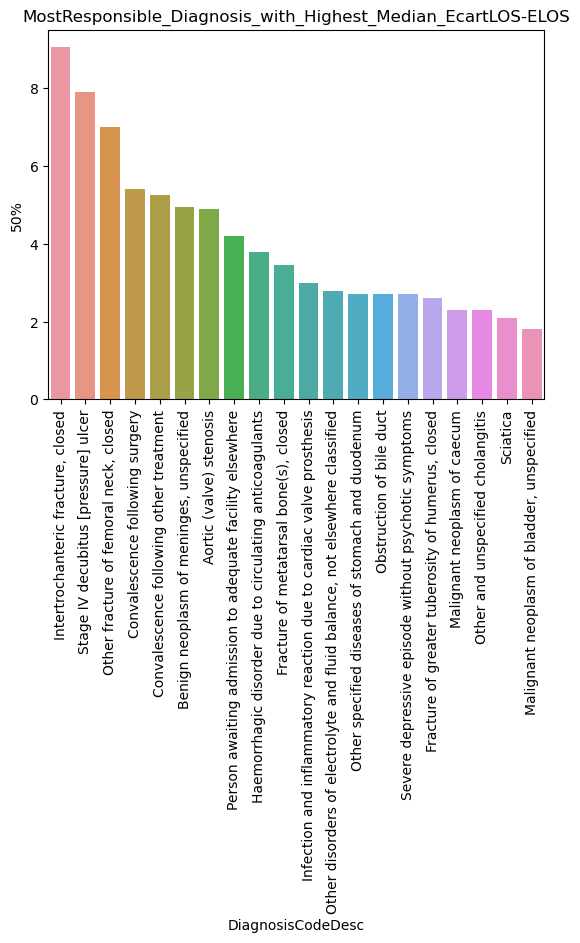

In [57]:
plt.xticks(rotation=90)
sns.barplot(x=dat8.index,y=dat8["50%"])
plt.title("MostResponsible_Diagnosis_with_Highest_Median_EcartLOS-ELOS")

The Most Responsible Diagnostics that most often come back to the Outliers.

In [23]:
data1_7.groupby("DiagnosisCodeDesc").describe()["EcartAcute-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
Chronic obstructive pulmonary disease with acute lower respiratory infection,106.0,15.277358,11.092643,7.2,8.900,12.25,18.425,81.4
"Chronic obstructive pulmonary disease with acute exacerbation, unspecified",81.0,12.683951,6.882650,7.1,8.000,10.10,13.800,41.6
Cellulitis of lower limb,56.0,14.323214,7.952129,7.1,8.275,11.35,17.225,41.7
Pneumonitis due to food and vomit,53.0,16.343396,8.603231,7.1,9.100,14.60,18.600,43.6
Unspecified dementia,50.0,13.768000,7.445350,7.3,9.300,10.85,17.025,46.5
"Atrial fibrillation, unspecified",48.0,12.377083,5.723235,7.1,8.600,10.60,13.525,32.3
"Intertrochanteric fracture, closed",21.0,20.614286,12.387707,7.8,11.900,18.70,20.900,52.3
Convalescence following surgery,21.0,16.485714,13.431987,7.8,9.700,11.80,16.800,63.5
Aortic (valve) stenosis,15.0,16.673333,7.283393,8.8,12.700,14.30,17.950,37.2


The Most Responsible Diagnostics that most often come back among the population.

In [30]:
data1_1[data1_1["DiagnosisTypeDesc"] == "Most Responsible"].groupby("DiagnosisCodeDesc").describe()["EcartAcute-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
DiagnosisCodeDesc,,,,,,,,
"Chronic obstructive pulmonary disease with acute exacerbation, unspecified",976.0,1.085963,4.793102,-14.3,-1.600,0.00,2.600,41.6
Chronic obstructive pulmonary disease with acute lower respiratory infection,772.0,1.878368,7.323112,-12.5,-2.100,-0.10,3.300,81.4
Cellulitis of lower limb,346.0,2.163873,6.759804,-6.8,-1.800,0.10,4.075,41.7
"Atrial fibrillation, unspecified",326.0,2.461350,5.235504,-3.9,-0.975,0.50,4.600,32.3
Unspecified dementia,299.0,-0.155853,8.095694,-19.8,-5.600,-2.50,3.950,46.5
Pneumonitis due to food and vomit,246.0,2.347561,8.885524,-12.8,-3.200,-0.40,4.975,43.6
Other chest pain,222.0,1.041892,2.254829,-2.4,-0.600,0.35,2.250,11.8
Hypo-osmolality and hyponatraemia,205.0,1.135122,3.923788,-6.2,-1.300,0.10,2.700,29.4
"Chest pain, unspecified",197.0,0.832487,2.057183,-2.5,-0.600,0.10,1.900,11.9


In [43]:
dat9 = data1_1[data1_1["DiagnosisTypeDesc"] == "Most Responsible"].groupby("DiagnosisCodeDesc").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

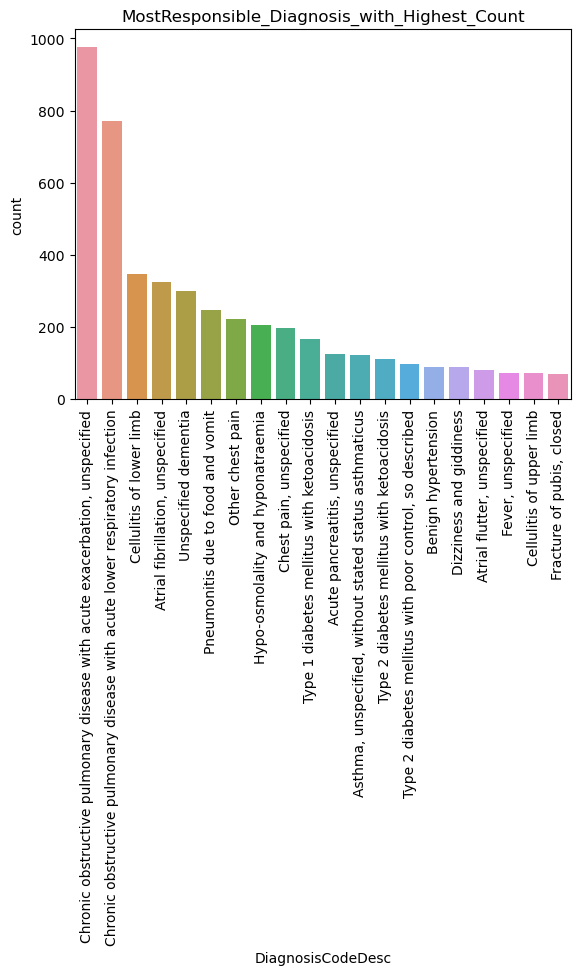

In [59]:
plt.xticks(rotation=90)
sns.barplot(x=dat9.index,y=dat9["count"])
plt.title("MostResponsible_Diagnosis_with_Highest_Count");

Here, we will look at the difference between patients with very frequent main diagnoses but with deviations <= 7 and > 7 days. The main diagnoses on which we will focus are various ranging from Pulmonary Disease to fever.

The objective here is to highlight the differences between these two groups in terms of Most Responsible diagnoses and to be able to explain why some of these patients stay longer than expected.

In [38]:
s91.sort_values(by="DifferenceBetweenOutlierAndNonOutlier",ascending=False).head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
Pneumonitis due to food and vomit,8.153846,3.568787,4.585059
Chronic obstructive pulmonary disease with acute lower respiratory infection,16.307692,12.315089,3.992604
Cellulitis of lower limb,8.615385,5.362426,3.252959
Unspecified dementia,7.692308,4.604290,3.088018
Convalescence following surgery,3.230769,0.591716,2.639053
"Atrial fibrillation, unspecified",6.923077,4.789201,2.133876
"Hepatic failure, unspecified",1.538462,0.369822,1.168639
Convalescence following other treatment,1.384615,0.240385,1.144231
Other and unspecified cirrhosis of liver,1.230769,0.517751,0.713018
"Fracture of acetabulum, closed",0.923077,0.277367,0.645710


In [39]:
s91.sort_values(by="DifferenceBetweenOutlierAndNonOutlier").head(20)

,OutlierProportions,NonOutlierProportions,DifferenceBetweenOutlierAndNonOutlier
"Chronic obstructive pulmonary disease with acute exacerbation, unspecified",12.461538,16.549556,-4.088018
"Chest pain, unspecified",0.153846,3.568787,-3.414941
Other chest pain,0.923077,3.920118,-2.997041
Type 1 diabetes mellitus with ketoacidosis,1.076923,2.977071,-1.900148
Hypo-osmolality and hyponatraemia,2.153846,3.531805,-1.377959
"Asthma, unspecified, without stated status asthmaticus",0.769231,2.144970,-1.375740
Type 2 diabetes mellitus with ketoacidosis,0.769231,1.960059,-1.190828
Benign hypertension,0.461538,1.571746,-1.110207
Cellulitis of upper limb,0.461538,1.257396,-0.795858
Dizziness and giddiness,0.769231,1.534763,-0.765533


We will look at the diagnoses that come up most often among group C patients (Gap >=14 days) and
Of group B (7< Gap <14).
These are either dangerous diseases or diseases with a large number of patients affected.
Chronic Obstructive Pulmonary Disease refers to COVID-19.

Group C (Ecart>14=) Most Frequent Diagnosis

In [38]:
groupcdata.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Chronic Obstructive Pulmonary Disease with Lower Respiratory Infection,39.0,24.287179,14.202412,14.6,17.650,19.30,25.450,81.4
Aspiration Pneumonia,28.0,22.385714,7.575336,14.4,17.300,18.50,26.425,43.6
Cellulitis,27.0,21.425926,7.246410,14.1,16.150,17.80,26.500,41.7
Dementia,27.0,28.877778,36.083678,14.0,17.150,20.00,23.500,204.5
Chronic Obstructive Pulmonary Disease without Lower Respiratory Infection,22.0,22.259091,7.293093,14.8,17.375,20.60,25.275,41.6
Cirrhosis/Alcoholic Hepatitis,18.0,24.444444,7.634690,14.2,18.925,23.25,27.775,38.7
Fixation/Repair Hip/Femur,16.0,25.031250,11.400627,14.2,17.975,19.55,30.300,52.3
Arrhythmia without Coronary Angiogram,15.0,21.053333,6.223443,14.0,16.300,18.50,26.000,32.3
"Cardiac Valve Disease, except Endocarditis",12.0,20.833333,6.442379,14.3,16.675,19.25,22.800,37.2


Group B (7<Ecart<14) Most Frequent Diagnosis

In [40]:
groupbdata.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Chronic Obstructive Pulmonary Disease with Lower Respiratory Infection,70.0,9.902857,1.987860,7.0,8.300,9.45,11.600,13.9
Chronic Obstructive Pulmonary Disease without Lower Respiratory Infection,65.0,9.613846,2.132331,7.0,7.900,9.00,11.000,13.8
Arrhythmia without Coronary Angiogram,50.0,9.742000,1.811538,7.0,8.125,9.70,10.800,13.6
Dementia,44.0,9.972727,1.944146,7.0,8.300,9.50,11.500,13.5
Cellulitis,36.0,9.197222,1.732626,7.1,7.700,8.60,10.250,13.7
Aspiration Pneumonia,25.0,9.576000,2.346856,7.1,7.400,8.60,12.100,13.6
"Diabetes, Other",24.0,8.820833,1.416971,7.1,7.400,8.80,9.575,12.2
Convalescence,21.0,10.414286,1.926729,7.3,8.800,10.40,11.800,13.8
Disorder of Fluid/Electrolyte Balance,20.0,8.980000,1.680413,7.0,7.650,8.65,9.850,12.7


Most frequent main diagnoses among the population.

In [41]:
data1_2.groupby("HIG_Description").describe()["EcartAcuteLOS-ELOS"].sort_values(by="count",ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
HIG_Description,,,,,,,,
Chronic Obstructive Pulmonary Disease without Lower Respiratory Infection,1015.0,1.127488,4.853426,-14.3,-1.600,0.00,2.600,41.6
Chronic Obstructive Pulmonary Disease with Lower Respiratory Infection,772.0,1.878368,7.323112,-12.5,-2.100,-0.10,3.300,81.4
Arrhythmia without Coronary Angiogram,685.0,1.572409,4.552820,-6.6,-1.100,0.20,3.100,32.3
"Diabetes, Other",493.0,0.662069,4.444587,-11.3,-1.600,-0.50,1.500,37.0
Cellulitis,463.0,1.710151,6.365913,-6.8,-1.800,-0.40,3.200,41.7
Dementia,407.0,0.441769,13.235133,-21.3,-5.700,-2.50,4.000,204.5
Disorder of Fluid/Electrolyte Balance,303.0,1.317492,4.560505,-10.5,-1.300,0.10,2.750,32.9
Angina (except Unstable)/Chest Pain without Coronary Angiogram,283.0,0.708834,2.114948,-2.4,-0.600,0.10,1.400,11.8
Aspiration Pneumonia,247.0,2.371255,8.851449,-12.8,-3.150,-0.40,4.850,43.6


In [18]:
data1_2["DischargeDayOfWeek"] = data1_2['DischargeDate'].dt.day_name()

In [19]:
data1_2["AdmissionDayOfWeek"] = data1_2['AdmissionDate'].dt.day_name()

In [ ]:
data1_2[data1_2["Typique-Atypique"] == "ATYPIQUE"]

ANALYSIS OF THE DAYS OF ADMISSION AND DEPARTURE OF PATIENTS FROM THE POINT OF VIEW OF THE OUTLIERS AND THE GENERAL POPULATION.

In [ ]:
OUTLIERS

In [21]:
d[d["Typique-Atypique"] == "ATYPIQUE"].groupby(["AdmissionDayOfWeek","DischargeDayOfWeek"]).describe()["EcartAcuteLOS-ELOS"]

count       mean        std   min  \
AdmissionDayOfWeek DischargeDayOfWeek                                      
Friday             Friday               12.0  16.991667  10.309083   7.5   
                   Monday                3.0  21.900000   8.487049  14.2   
                   Saturday              4.0  18.625000   6.761841  12.2   
                   Sunday                2.0  22.250000  10.818734  14.6   
                   Thursday             14.0  16.257143  10.569529   7.2   
                   Tuesday              15.0  18.680000  12.142440   7.8   
                   Wednesday            11.0  17.772727   6.403451   9.8   
Monday             Friday                6.0  17.733333   8.102263   7.2   
                   Monday                9.0  17.400000   8.907441  10.5   
                   Saturday              7.0  15.000000   4.138438   8.7   
                   Sunday                4.0  17.150000   6.860758   7.1   
                   Thursday             10.0  20.450000   9.596672   8.6   
                   Tuesday              15.0  15.680000   6.039891   7.5   
                   Wednesday            12.0  16.108333  10.518163   7.1   
Saturday           Friday               10.0  18.070000  10.818200   9.4   
                   Monday                5.0  21.020000   8.438128  11.0   
                   Saturday              3.0  19.100000   9.763196   8.3   
                   Sunday                3.0  12.033333   2.837840   9.5   
                   Thursday             15.0  19.860000   8.713930  10.1   
                   Tuesday              10.0  15.550000   7.777353   8.1   
                   Wednesday            11.0  20.627273   8.111361  10.5   
Sunday             Friday               10.0  15.840000   7.902911   9.2   
                   Monday                8.0  17.087500   6.843023   9.8   
                   Saturday              2.0  21.700000  15.839192  10.5   
                   Sunday                4.0  15.650000   1.391642  14.6   
                   Thursday             10.0  21.740000  15.401674   7.3   
                   Tuesday               9.0  46.411111  63.212428   7.8   
                   Wednesday             8.0  17.050000   9.073352   9.8   
Thursday           Friday               17.0  21.147059  10.661444   8.9   
                   Monday                6.0  11.550000   4.788215   7.4   
                   Saturday              4.0  17.600000   9.104211   7.5   
                   Sunday                3.0  12.000000   4.070626   7.3   
                   Thursday             16.0  21.812500  10.599363   9.2   
                   Tuesday              11.0  17.800000   7.406349   8.6   
                   Wednesday            17.0  16.852941   9.302830   9.7   
Tuesday            Friday               15.0  24.580000  14.368875   7.2   
                   Monday                9.0  18.422222   9.200921   7.8   
                   Saturday              3.0  16.833333   6.453165   9.4   
                   Sunday                4.0  23.600000   9.508593  15.3   
                   Thursday             13.0  21.000000  16.390953   7.1   
                   Tuesday              15.0  21.720000  10.486127   8.3   
                   Wednesday             8.0  20.037500  16.085747  11.9   
Wednesday          Friday               11.0  21.163636   8.700606   9.9   
                   Monday               13.0  16.269231  10.398989   7.4   
                   Saturday              7.0  16.885714   6.863534   8.4   
                   Sunday                4.0  22.100000  11.678756  12.3   
                   Thursday             13.0  14.700000   8.097428   7.3   
                   Tuesday              10.0  25.860000  19.991120  10.3   
                   Wednesday            23.0  16.665217  11.043699   7.3   

                                          25%    50%     75%    max  
AdmissionDayOfWeek DischargeDayOfWeek                                
Friday             Fri

GENERAL POPULATION

In [15]:
data1_2[data1_2["Typique-Atypique"] == "ATYPIQUE"].groupby(["AdmissionDayOfWeek","DischargeDayOfWeek"]).describe()["EcartAcuteLOS-ELOS"]

count       mean        std   min  \
AdmissionDayOfWeek DischargeDayOfWeek                                      
Friday             Friday               27.0   6.270370  12.644756 -12.8   
                   Monday               20.0   3.195000   9.469256  -8.5   
                   Saturday             24.0   0.620833   9.033030  -9.5   
                   Sunday               15.0   2.086667  10.076909  -9.7   
                   Thursday             27.0   8.259259  11.559487  -7.7   
                   Tuesday              28.0   9.639286  13.283500  -3.5   
                   Wednesday            31.0   7.148387   9.265883  -5.9   
Monday             Friday               19.0   5.221053  10.340298  -9.0   
                   Monday               33.0   3.527273  10.511312 -17.4   
                   Saturday             13.0   7.284615   9.288599  -6.1   
                   Sunday               10.0   7.170000   9.785482  -3.9   
                   Thursday             27.0   6.814815  12.295362  -8.7   
                   Tuesday              48.0   2.689583  10.120345 -20.1   
                   Wednesday            35.0   5.191429  10.519852  -9.9   
Saturday           Friday               28.0   6.360714  11.905378 -15.3   
                   Monday               25.0   2.256000  10.941781  -9.7   
                   Saturday             18.0   1.061111   9.122509  -6.4   
                   Sunday               15.0   1.900000   6.295463  -5.7   
                   Thursday             29.0  10.658621  11.824083  -6.7   
                   Tuesday              24.0   6.195833   9.950201  -8.7   
                   Wednesday            23.0   9.517391  12.407646  -4.8   
Sunday             Friday               16.0   9.137500  11.086020  -7.5   
                   Monday               42.0   1.635714   8.814147  -8.1   
                   Saturday              3.0  15.366667  15.677160   2.7   
                   Sunday               12.0   3.016667   9.706121 -10.7   
                   Thursday             23.0   8.108696  16.492255 -21.3   
                   Tuesday              33.0  11.281818  38.552030  -8.5   
                   Wednesday            22.0   6.363636  10.597598  -8.0   
Thursday           Friday               59.0   3.683051  12.824722  -9.5   
                   Monday               21.0   3.176190   6.339472  -4.3   
                   Saturday             21.0   1.200000  10.594244 -21.7   
                   Sunday               13.0   0.869231   8.614850 -19.8   
                   Thursday             35.0   9.882857  13.491380 -10.8   
                   Tuesday              26.0   7.861538  10.074962  -7.0   
                   Wednesday            30.0   8.776667  12.233382 -10.0   
Tuesday            Friday               40.0   8.037500  16.051515 -12.3   
                   Monday               25.0   8.036000   9.844960  -3.1   
                   Saturday             11.0   3.127273   9.905159  -9.6   
                   Sunday               10.0   8.290000  14.596381  -8.7   
                   Thursday             38.0   5.313158  15.325781 -11.5   
                   Tuesday              34.0   8.908824  13.777328 -10.1   
                   Wednesday            45.0   1.668889  11.265753 -12.5   
Wednesday          Friday               26.0   8.407692  12.892042  -8.5   
                   Monday               33.0   5.524242  11.491084 -14.7   
                   Saturday             21.0   4.157143  10.675700 -12.0   
                   Sunday                7.0  12.014286  15.162830  -5.0   
                   Thursday             51.0   1.874510   9.418786 -10.5   
                   Tuesday              21.0  13.414286  18.221012  -2.5   
                   Wednesday            44.0   7.677273  12.718415 -11.7   

                                         25%    50%     75%    max  
AdmissionDayOfWeek DischargeDayOfWeek                               
Friday             Frida

In [129]:
d2 = data1_2[(data1_2["DischargeDayOfWeek"] != "Saturday")]

In [130]:
d3 = d2[(d2["DischargeDayOfWeek"] != "Sunday")]

DESTINATION OF DISCHARGE OF PATIENTS DISCHARGED DURING THE WEEK

In [141]:
d3["InstitutionToDesc"].value_counts(dropna=False,normalize=True).head(20)*100

NaN                                                      54.658288
Champlain - Ottawa (HC)                                  18.413197
Hopital Montfort - Ottawa (GR)                            6.959937
HOME FOR THE AGED-ONTARIO-GENERIC #                       5.985860
Extendicare/laurier Manor - Gloucester (NH)               1.413983
University Of Ottawa Heart Institute - Ottawa (AT)        1.241163
GROUP LIVING/SUPP HOUSING - ON GEN                        1.021210
ACS BRUYERE CC GREYSTONE VILLAGE                          0.801257
St. Louis Residence - Gloucester (HF)                     0.769835
HOPITAL MONTFORT                                          0.769835
Sisters Of Charity Of Ottawa Hospital - Ottawa (GR)       0.706991
Sisters Of Charity Of Ottawa Hospital - Ottawa (CR)       0.691280
TRANSIT.HOUSING/SHELTER ON-GENERIC#                       0.628437
HOME CARE PROGRAM-ONTARIO-GENERIC #                       0.581304
Centre De Soins De Longue Duree - CLSD Montfort (NH)      0.51

DISCHARGE DESTINATION OF PATIENTS DISCHARGED DURING THE WEEKEND
We see that patients who are discharged during the weekend are less complex in terms of treatment and are more sent home than patients who are discharged during the week (75% compared to 54%)

In [140]:
d1["InstitutionToDesc"].value_counts(dropna=False,normalize=True).head(20)*100

NaN                                                           75.162791
Champlain - Ottawa (HC)                                       13.116279
HOME FOR THE AGED-ONTARIO-GENERIC #                            4.837209
University Of Ottawa Heart Institute - Ottawa (AT)             1.302326
Ottawa Hospital ( The )-General Site - Ottawa (AP)             1.116279
TRANSIT.HOUSING/SHELTER ON-GENERIC#                            0.744186
GROUP LIVING/SUPP HOUSING - ON GEN                             0.651163
Sisters Of Charity Of Ottawa Hospital - Ottawa (CR)            0.372093
HOPITAL MONTFORT                                               0.372093
Ottawa Hospital ( The )-Civic Site - Ottawa (AP)               0.372093
St. Louis Residence - Gloucester (HF)                          0.279070
Extendicare/laurier Manor - Gloucester (NH)                    0.279070
GARRY J.ARMSTRONG LONG TERM CARE HOME                          0.279070
All Non Acute Health Care Fac-Quebec - quebec (IN)             0

In [15]:
t = data1_2[data1_2["EcartAcuteLOS-ELOS"] >7]

The following two tables show us that patients are discharged much less during the weekend than the rest of the week (2 to 3 times less discharge on weekend days)

Outliers' Point of View

In [16]:
t.groupby("DischargeDayOfWeek").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
DischargeDayOfWeek,,,,,,,,
Friday,186.0,15.099462,9.373802,7.1,8.600,11.75,18.225,58.6
Monday,122.0,13.676230,7.102369,7.1,8.300,10.60,17.000,41.1
Saturday,47.0,14.914894,6.639047,7.5,9.800,12.60,19.800,32.9
Sunday,42.0,13.826190,7.701443,7.1,8.000,11.10,15.600,37.0
Thursday,168.0,15.747619,9.712533,7.1,9.125,12.30,18.575,63.5
Tuesday,171.0,16.358480,17.873108,7.1,8.800,11.90,17.500,204.5
Wednesday,177.0,14.176836,8.293006,7.1,8.900,11.60,16.500,59.6


In [ ]:
General Population's Point of View

In [145]:
data1_2.groupby("DischargeDayOfWeek").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
DischargeDayOfWeek,,,,,,,,
Friday,1548.0,1.686240,6.590710,-15.3,-1.6,0.1,3.100,58.6
Monday,1038.0,1.445761,5.892224,-17.4,-1.6,0.0,3.075,41.1
Saturday,553.0,0.673056,5.585620,-21.7,-2.1,-0.4,1.900,32.9
Sunday,522.0,0.651533,5.169088,-19.8,-1.8,-0.4,1.400,37.0
Thursday,1304.0,1.831825,7.062593,-21.3,-1.6,0.1,3.300,63.5
Tuesday,1236.0,2.222977,9.179451,-20.1,-1.6,0.4,3.400,204.5
Wednesday,1239.0,1.997256,6.552276,-12.5,-1.6,0.3,3.850,59.6


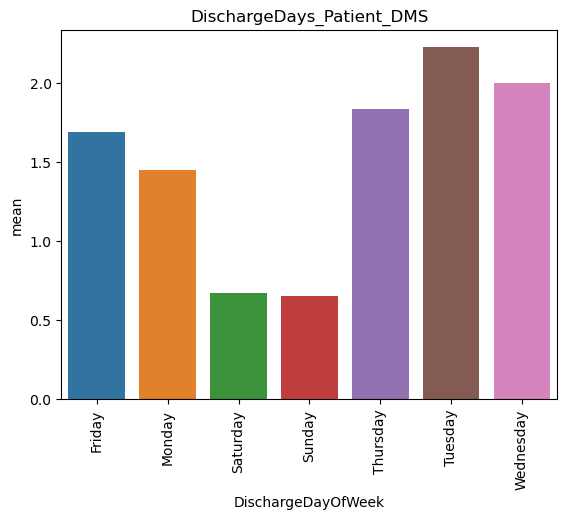

In [13]:
plt.xticks(rotation=90)
sns.barplot(x=dat9.index,y=dat9["mean"])
plt.title("DischargeDays_Patient_DMS");

In [22]:
d = data1_2[data1_2["EcartAcuteLOS-ELOS"] >=7]

We have a certain uniformity in the days of admission of patients

Point of view of the Outliers

In [23]:
d.groupby("AdmissionDayOfWeek").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
AdmissionDayOfWeek,,,,,,,,
Friday,134.0,14.283582,7.896218,7.0,8.300,12.25,16.95,45.4
Monday,134.0,13.635075,6.851949,7.1,8.625,11.35,17.15,45.7
Saturday,134.0,14.003731,7.173588,7.0,9.400,11.60,16.75,45.3
Sunday,103.0,17.112621,21.328250,7.0,9.250,12.70,17.85,204.5
Thursday,130.0,15.099231,8.782669,7.0,8.600,11.80,19.65,48.7
Tuesday,137.0,16.213139,11.190147,7.0,8.900,11.90,19.70,63.5
Wednesday,154.0,14.529870,9.805055,7.0,8.300,10.80,17.10,77.7


Population point of view

In [24]:
data1_2.groupby("AdmissionDayOfWeek").describe()["EcartAcuteLOS-ELOS"]

,count,mean,std,min,25%,50%,75%,max
AdmissionDayOfWeek,,,,,,,,
Friday,1010.0,1.909802,6.302787,-13.4,-1.500,0.4,3.30,45.4
Monday,1091.0,1.378185,5.942708,-20.1,-1.800,0.0,3.00,45.7
Saturday,1042.0,1.626967,6.096467,-15.3,-1.600,0.0,3.00,45.3
Sunday,988.0,1.635020,9.137276,-21.3,-1.600,-0.1,2.80,204.5
Thursday,1094.0,1.585283,6.559519,-21.7,-1.700,0.1,3.00,48.7
Tuesday,1115.0,1.682601,7.297105,-12.5,-1.800,-0.2,3.05,63.5
Wednesday,1100.0,1.891455,6.878976,-14.7,-1.525,0.3,3.30,77.7


In [15]:
dat1_2 = data1_2[data1_2["EcartAcuteLOS-ELOS"]<100]

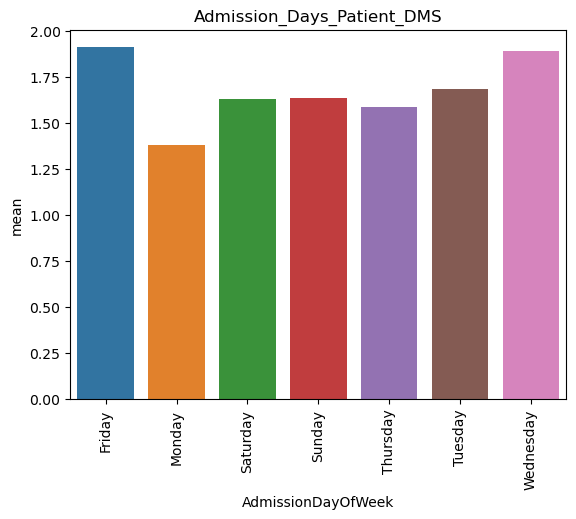

In [26]:
plt.xticks(rotation=90)
sns.barplot(x=dat10.index,y=dat10["mean"])
plt.title("Admission_Days_Patient_DMS");

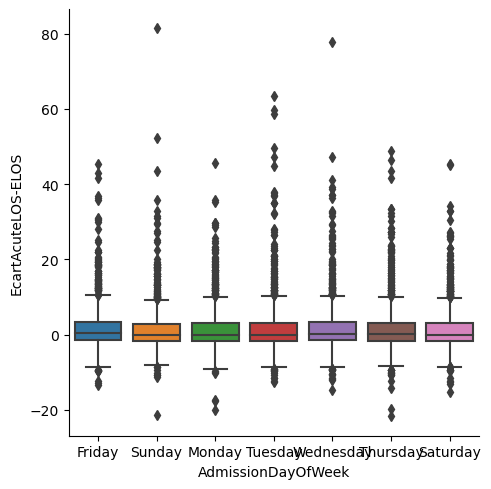

In [22]:

sns.catplot(data=dat1_2, x="AdmissionDayOfWeek", y="EcartAcuteLOS-ELOS", kind="box")

In [44]:
def WeekdaySepar1(x):
    if x == "Tuesday" or x == "Wednesday":
        return 1
    else:
        return 0

In [29]:
def WeekdaySepar(x):
    if x == "Saturday" or x == "Sunday" or x == "Friday":
        return 1
    else:
        return 0
data1_2["BinaryAdmissionDayOfWeek"] = data1_2["AdmissionDayOfWeek"].apply(WeekdaySepar)    
WeekendAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 1]
WeekAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 0]

In [30]:
data1_2["BinaryAdmissionDayOfWeek"] = data1_2["AdmissionDayOfWeek"].apply(WeekdaySepar)

In [32]:
WeekendAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 1]

In [33]:
WeekAdmission = data1_2[data1_2["BinaryAdmissionDayOfWeek"] == 0]

In [43]:
import scipy.stats as stats
stats.mannwhitneyu(x=WeekendAdmission["EcartAcuteLOS-ELOS"], y=WeekAdmission["EcartAcuteLOS-ELOS"], alternative = 'greater')

MannwhitneyuResult(statistic=6805851.5, pvalue=0.09781945949356519)

In [45]:
data1_2["BinaryDischargeDayOfWeek"] = data1_2["DischargeDayOfWeek"].apply(WeekdaySepar1)

In [46]:
WeekendDischarge = data1_2[data1_2["BinaryDischargeDayOfWeek"] == 1]

In [47]:
WeekDischarge = data1_2[data1_2["BinaryDischargeDayOfWeek"] == 0]

In [48]:
import scipy.stats as stats
stats.mannwhitneyu(x=WeekendDischarge["EcartAcuteLOS-ELOS"], y=WeekDischarge["EcartAcuteLOS-ELOS"], alternative = 'greater')

MannwhitneyuResult(statistic=6507972.5, pvalue=1.539064386408083e-05)

PREPARATION TO MAKE THE REGRESSION MODEL

In [12]:
def age_sep(x):
    if x == 3:
        return 1
    else:
        return 0

In [9]:
data1_3 = data1_2

In [13]:
data1_3["Age_Group"] = data1_3["AgeGroup"].apply(age_sep)

In [14]:
def providesep(x):
    if x == "Family Practice/General Practice":
        return 1
    else:
        return 0

In [15]:
data1_3["ProviderCat"] = data1_3["ProviderServiceDesc"].apply(providesep)

In [16]:
data1_3["DischargeDispositionDesc"].value_counts()

Discharge to private home, condo, apt without support service/referral    11217
Discharge to private home, condo, apt with support                         4716
Transfer to reporting or another facility for inpatient care               3723
Transfer to group / supportive living                                      2421
Died in Facility                                                           2029
Transfer to residential care                                                824
Left against medical advice (LAMA)                                          647
Absent without leave (AWOL)                                                  42
Medical Assistance in Dying (MAID)                                           36
Transfer to reporting or another emergency dept or ambulatory care           26
Transfer to correctional facility                                            15
Did not return from pass/leave                                                3
Name: DischargeDispositionDesc, dtype: i

In [17]:
def Dischargesep(x):
    if x == "Died in Facility":
        return "Dead"
    elif x == "Discharge to private home, condo, apt without support service/referral" or x == "Discharge to private home, condo, apt with support":
        return "Home"
    elif x == "Transfer to reporting or another facility for inpatient care" or x == "Transfer to group / supportive living" or x == "Transfer to residential care":
        return "Facility"
    else:
        return "Special Cases"

In [18]:
data1_3["Discharge_Destination"] = data1_3["DischargeDispositionDesc"].apply(Dischargesep)

In [21]:
def gendersep(x):
    if x == "F":
        return 1
    if x == "M":
        return 0

In [22]:
data1_3["Gender"]

0        F
1        F
2        F
3        M
4        M
        ..
25694    F
25695    F
25696    F
25697    F
25698    F
Name: Gender, Length: 25699, dtype: object

In [23]:
data1_3["GenderCat"] = data1_3["Gender"].apply(gendersep)

ADMISSION§DISCHARGE STATUS

In [25]:
data1_3["DischargeDay"]

0        Thursday
1        Thursday
2         Tuesday
3        Thursday
4        Thursday
           ...   
25694      Sunday
25695    Thursday
25696    Saturday
25697      Friday
25698      Friday
Name: DischargeDay, Length: 25699, dtype: object

In [24]:
data1_3["DischargeDay"] = data1_3["DischargeDate"].dt.day_name()

In [26]:
def dischargesep(x):
    if x == "Saturday" or x == "Sunday":
        return 1
    else:
        return 0

In [27]:
data1_3["Week-end Discharge Status"] = data1_3["DischargeDay"].apply(dischargesep)

In [28]:
data1_3["AdmissionDay"] = data1_3["AdmissionDate"].dt.day_name()

In [29]:
data1_3["Week-end Admission Status"] = data1_3["AdmissionDay"].apply(dischargesep)

In [30]:
data1_3["Week-end Admission Status"].value_counts()

0    18739
1     6960
Name: Week-end Admission Status, dtype: int64

In [31]:
data1_3["ReAdmitCodeDesc"].value_counts()

None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission      13155
New patient to the acute care unit                                                                                                              10908
Acute 8-28 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission      718
Planned readmission from previous acute care (no time restriction)(admit category maybe L - elective or U - urgent/emergent)                      452
Acute <= 7 days; unplanned readmission from previous acute admission and readmission diagnosis is the same/related to the previous admission      435
<= 7 days; unplanned readmission (from day surgery) and readmission diagnosis is the same/related to the previous admission                        27
Name: ReAdmitCodeDesc, dtype: int64

In [32]:
def readmitsep(x):
    if x == "New patient to the acute care unit":
        return "New"
    elif x == "None of the above, i.e. unplanned readmission > 28 days, unplanned readmission with a diagnosis not same/related to the previous admission":
        return "Read>28d/unrelated"
    else:
        return "Readmission<28"

In [33]:
data1_3["ReadmissionStatus"] = data1_3["ReAdmitCodeDesc"].apply(readmitsep)

In [34]:
def ecartsep(x):
    if x>= 7:
        return 1
    else:
        return 0

In [36]:
data1_3["EcartCategorical"] = data1_3["Ecart_DmsAcute-DmsHigELOS"].apply(ecartsep)

In [37]:
data1_31 = data1_3[data1_3["DischargeNursingAreaUnitDesc"] != "ICU"]

In [39]:
data1_3

,HIG_Description,InstitutionTo,InstitutionToDesc,NbConge,MoyAcuteLos,MoyDureeSejour,TotalJrsAlc,ALCLOS,TotLosDays,MoyHigElos,...,Age_Group,ProviderCat,Discharge_Destination,GenderCat,DischargeDay,Week-end Discharge Status,AdmissionDay,Week-end Admission Status,ReadmissionStatus,EcartCategorical
0,Abscess,NaN,NaN,1,3,3,0,0,3,3.5,...,0,0,Home,1,Thursday,0,Monday,0,New,0
1,Abscess,NaN,NaN,1,2,2,0,0,2,3.5,...,0,0,Home,1,Thursday,0,Tuesday,0,New,0
2,Abscess,NaN,NaN,1,1,1,0,0,1,3.5,...,0,0,Home,1,Tuesday,0,Monday,0,New,0
3,Abscess,NaN,NaN,1,4,4,0,0,4,3.5,...,0,0,Home,0,Thursday,0,Sunday,1,New,0
4,Abscess,50008.0,HOME CARE PROGRAM-ONTARIO-GENERIC #,1,10,10,0,0,10,4.7,...,1,1,Home,0,Thursday,0,Monday,0,Read>28d/unrelated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25694,Bronchiectasis,NaN,NaN,1,3,3,0,0,3,6.4,...,1,1,Home,1,Sunday,1,Thursday,0,New,0
25695,Other Degenerative Disease of Nervous System,NaN,NaN,1,7,7,0,0,7,4.9,...,0,1,Home,1,Thursday,0,Thursday,0,Read>28d/unrelated,0
25696,Fever,NaN,NaN,1,2,2,0,0,2,2.9,...,0,1,Home,1,Saturday,1,Thursday,0,Read>28d/unrelated,0
25697,Ischemic Event of Central Nervous System,54665.0,Champlain - Ottawa (HC),1,8,8,0,0,8,6.1,...,1,1,Home,1,Friday,0,Thursday,0,Read>28d/unrelated,0


In [40]:
data1_4 = data1_3[["Age_Group","ComorbidityLevel","ProviderCat","Discharge_Destination","GenderCat","Week-end Discharge Status","Week-end Admission Status","ReadmissionStatus"]]

In [41]:
ydata = data1_3["EcartCategorical"]

In [42]:
data1_5 = pd.get_dummies(data1_4)

In [43]:
data1_5

,Age_Group,ComorbidityLevel,ProviderCat,GenderCat,Week-end Discharge Status,Week-end Admission Status,Discharge_Destination_Dead,Discharge_Destination_Facility,Discharge_Destination_Home,Discharge_Destination_Special Cases,ReadmissionStatus_New,ReadmissionStatus_Read>28d/unrelated,ReadmissionStatus_Readmission<28
0,0,2,0,1,0,0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,1,0,0
4,1,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25694,1,2,1,1,1,0,0,0,1,0,1,0,0
25695,0,3,1,1,0,0,0,0,1,0,0,1,0
25696,0,0,1,1,1,0,0,0,1,0,0,1,0
25697,1,3,1,1,0,0,0,0,1,0,0,1,0


In [44]:
data1_5 = data1_5.drop(['Discharge_Destination_Home', 'ReadmissionStatus_New'], axis=1)

In [45]:
data1_5["Ecart"] = ydata

In [52]:
data1_5

,Age_Group,ComorbidityLevel,ProviderCat,GenderCat,Week-end Discharge Status,Week-end Admission Status,Discharge_Destination_Dead,Discharge_Destination_Facility,Discharge_Destination_Special Cases,ReadmissionStatus_Read>28d/unrelated,ReadmissionStatus_Readmission<28,Ecart
0,0,0,1,1,0,0,0,0,0,0,1,1
7,1,3,1,0,0,0,0,1,0,1,0,0
20,1,1,1,1,0,1,0,0,0,1,0,0
24,0,2,0,1,0,0,0,0,0,0,0,0
32,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43491,0,0,1,0,0,1,0,1,0,1,0,0
43495,0,0,1,1,0,1,0,0,0,1,0,0
43500,0,2,0,0,0,1,0,1,0,1,0,0
43507,0,0,1,1,0,1,0,0,0,0,0,0


In [12]:
notICUData = data1_2[data1_2["DischargeNursingAreaUnitDesc"] != "ICU"]

In [14]:
notICUData.groupby("ProviderServiceDesc").mean()

/var/folders/3y/lq81_2896n7b3sw4lbgpl5100000gp/T/ipykernel_8490/583260449.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  notICUData.groupby("ProviderServiceDesc").mean()


,AcuteLOS,ALCLOS,DureeSejour,AgeGroup,ageNumber,ComorbidityLevel,Complexity_Description,DiagnosisOccurrence,DischHour,DureeSejour2,HIG_ELOS,HIG_Weight,RIW,EcartAcuteLOS-ELOS
ProviderServiceDesc,,,,,,,,,,,,,,
Emergency Medicine,1.000000,0.000000,0.000000,3.000000,70.000000,0.000000,NaN,1.000000,10.000000,0.000000,4.000000,0.681600,0.643400,-3.000000
Family Practice/General Practice,7.420612,4.112852,11.509256,2.553400,69.458704,1.165361,NaN,3.737451,13.035600,11.509256,5.386454,1.685096,1.599213,2.034158
Internal Medicine,6.659574,1.177763,7.813315,2.489362,65.973919,1.085106,NaN,3.354152,13.473576,7.813315,5.337886,1.479490,1.340376,1.321688
Practitioner Nursing,19.000000,177.000000,196.000000,3.000000,89.000000,4.000000,NaN,5.000000,9.000000,196.000000,11.500000,22.216800,19.046400,7.500000


In [15]:
data1_2.groupby("ProviderServiceDesc").mean()

/var/folders/3y/lq81_2896n7b3sw4lbgpl5100000gp/T/ipykernel_8490/2842056307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1_2.groupby("ProviderServiceDesc").mean()


,AcuteLOS,ALCLOS,DureeSejour,AgeGroup,ageNumber,ComorbidityLevel,Complexity_Description,DiagnosisOccurrence,DischHour,DureeSejour2,HIG_ELOS,HIG_Weight,RIW,EcartAcuteLOS-ELOS
ProviderServiceDesc,,,,,,,,,,,,,,
Emergency Medicine,1.000000,0.000000,0.000000,3.000000,70.000000,0.000000,NaN,1.000000,10.000000,0.000000,4.000000,0.681600,0.643400,-3.000000
Family Practice/General Practice,7.425831,4.112631,11.514301,2.553384,69.465447,1.168058,NaN,3.739563,13.032333,11.514301,5.397300,1.688817,1.602552,2.028531
Internal Medicine,6.341072,0.957435,7.269210,2.449972,64.228303,1.195135,NaN,3.386954,13.411830,7.269210,5.782145,1.673783,1.430730,0.558928
Practitioner Nursing,19.000000,177.000000,196.000000,3.000000,89.000000,4.000000,NaN,5.000000,9.000000,196.000000,11.500000,22.216800,19.046400,7.500000


In [46]:
data1_6 = data1_5

In [48]:
data1_6.to_excel('data1_7.xlsx', index=False)

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(endog=list(ydata),exog=data1_5)
result=logit_model.fit(maxiter=10000,disp=True)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399507
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7440
Model:                          Logit   Df Residuals:                     7429
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                -0.06330
Time:                        15:41:26   Log-Likelihood:                -2972.3
converged:                       True   LL-Null:                       -2795.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Age_Group                               -0.3922      0.0

This section presents a model for predicting the number of days in hospital based on the significant variables analyzed above. A multiple regression analysis was performed to develop the model.

The following five variables were used as independent variables: High-risk primary diagnoses, age, level of comorbidity, sex, category of care (Family medicine or internal medicine).

Four of these five variables were statistically significant and, therefore, correlated with the prediction of the outlier status of patients.

To go into more detail, the model tells us: When the age increases by one unit, the chances of being an outlier are 0.96 times the chances of not being an outlier.

For gender, a man has 0.59 times the same chance as a woman of being an outlier.
For high-risk diagnoses of pushing towards important deviations, considering the 20 most dangerous, patients with these diagnoses are 4 to 5 times more likely to be outliers than the rest of the patients.
For the level of comorbidities, by increasing by one unit, the chances of being an outlier are 1.91 times the chance of not being an outlier.
The category is not significant but tells us that patients in family practice are 0.87 times more likely to be an outlier than those in internal medicine.

In [55]:
import statsmodels.api as sm
logit_model=sm.Logit(endog=list(ydata1_3),exog=final_data1_3)
result=logit_model.fit(maxiter=10000,disp=True)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.352902
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7440
Model:                          Logit   Df Residuals:                     7435
Method:                           MLE   Df Model:                            4
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.06074
Time:                        15:31:50   Log-Likelihood:                -2625.6
converged:                       True   LL-Null:                       -2795.4
Covariance Type:            nonrobust   LLR p-value:                 3.128e-72
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ageNumber                -0.0384      0.001    -29.138      0.000      -0.041      -0.

For pre-admission diagnoses at high risk of pushing towards significant deviations, considering the 20 most dangerous, patients with these diagnoses are twice as likely to be outliers than the rest of the patients.

For secondary diagnoses at high risk of pushing towards significant deviations, considering the 20 most dangerous, patients with these diagnoses are 1.75 times more likely to be outliers than the rest of the patients.

For main diagnoses at high risk of pushing towards significant deviations, considering the 20 most dangerous, patients with these diagnoses are 1.96 times more likely to be outliers than the rest of the patients.

In [76]:
import statsmodels.api as sm

logit_model=sm.Logit(endog=list(ypre_data),exog=final_pre_data)
result=logit_model.fit(maxiter=10000,disp=True)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506937
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16123
Model:                          Logit   Df Residuals:                    16119
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.03989
Time:                        15:40:46   Log-Likelihood:                -8173.3
converged:                       True   LL-Null:                       -8512.9
Covariance Type:            nonrobust   LLR p-value:                6.798e-147
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
HighRiskPreAdmitDia     0.7338      0.084      8.764      0.000       0.570       0.898
ag

In [86]:
import statsmodels.api as sm

logit_model=sm.Logit(endog=list(ysecon_data),exog=final_secon_data)
result=logit_model.fit(maxiter=10000,disp=True)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.435967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                13354
Model:                          Logit   Df Residuals:                    13350
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.05798
Time:                        15:44:57   Log-Likelihood:                -5821.9
converged:                       True   LL-Null:                       -6180.3
Covariance Type:            nonrobust   LLR p-value:                4.987e-155
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighRiskSecondaryDia     0.5652      0.088      6.456      0.000       0.394       0.737

In [94]:
import statsmodels.api as sm

logit_model=sm.Logit(endog=list(ymostres_data),exog=final_mostres_data)
result=logit_model.fit(maxiter=10000,disp=True)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.354814
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7440
Model:                          Logit   Df Residuals:                     7436
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.04697
Time:                        15:48:57   Log-Likelihood:                -2639.8
converged:                       True   LL-Null:                       -2769.9
Covariance Type:            nonrobust   LLR p-value:                 4.078e-56
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
HighRiskMostResponsible     0.6829      0.122      5.605      0.000       0.444   

In the end, the differences in DMS are influenced by various factors; the age, the level of comorbidity but where we should focus is mainly on pre-admit, secondary and most responsible diagnoses.

By focusing on these diagnoses most present in outliers, we can start from there to determine what differentiates a patient with a small gap and another who will tend to stay beyond his Expected Length of Stay (LOS).

Conclusion: This study aimed to analyze the data in order to highlight the categories of diagnoses, age. In order to draw up a profile of patients likely to have significant deviations. Patients with a higher and older level of comorbidity have been associated with greater deviations.

Similarly, it has been noted that patients with a primary diagnosis (HIG) related to a fracture, cardiovascular disease, neurological disorders end up with higher average differences.

It is important to note that variables such as patient characteristics cannot be changed in hospital practice.

There were certain limits to this study that had to be addressed. First of all, the analysis of the patient's process in correlation with the LOS was based on data from a single hospital. As there are differences between hospitals in the admission process and treatment plans, generalization was limited and it is important to collect and analyze data from several hospitals. The LOS can also be linked to the month of the year or the day of the week of the admission/discharge date.

Finally, Montfort Hospital is a university hospital; This category of hospital has been recognized in various studies as having greater differences than other types of hospitals.